In [72]:
import pandas as pd
import sys
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_absolute_error
from scipy.stats import norm
from sklearn import metrics
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [73]:
train = pd.read_csv('wine_train.csv')
test = pd.read_csv('wine_test.csv')

In [74]:
train.columns

Index(['INDEX', 'TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS'],
      dtype='object')

In [75]:
train.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [76]:
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in test.columns]

# Summary of data

In [77]:
train_columns = train.columns
print(train_columns)

Index(['index', 'target', 'fixedacidity', 'volatileacidity', 'citricacid',
       'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide',
       'density', 'ph', 'sulphates', 'alcohol', 'labelappeal', 'acidindex',
       'stars'],
      dtype='object')


In [78]:
train.shape

(12795, 16)

In [79]:
test.shape

(3335, 16)

In [80]:
test_columns = test.columns
print(test_columns)

Index(['index', 'target', 'fixedacidity', 'volatileacidity', 'citricacid',
       'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide',
       'density', 'ph', 'sulphates', 'alcohol', 'labelappeal', 'acidindex',
       'stars'],
      dtype='object')


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
index                 12795 non-null int64
target                12795 non-null int64
fixedacidity          12795 non-null float64
volatileacidity       12795 non-null float64
citricacid            12795 non-null float64
residualsugar         12179 non-null float64
chlorides             12157 non-null float64
freesulfurdioxide     12148 non-null float64
totalsulfurdioxide    12113 non-null float64
density               12795 non-null float64
ph                    12400 non-null float64
sulphates             11585 non-null float64
alcohol               12142 non-null float64
labelappeal           12795 non-null int64
acidindex             12795 non-null int64
stars                 9436 non-null float64
dtypes: float64(12), int64(4)
memory usage: 1.6 MB


In [82]:
# show descriptive statistics
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,12795.0,8069.980305,4656.905107,1.00000,4037.50000,8110.00000,12106.500000,16129.00000
target,12795.0,3.029074,1.926368,0.00000,2.00000,3.00000,4.000000,8.00000
fixedacidity,12795.0,7.075717,6.317643,-18.10000,5.20000,6.90000,9.500000,34.40000
volatileacidity,12795.0,0.324104,0.784014,-2.79000,0.13000,0.28000,0.640000,3.68000
citricacid,12795.0,0.308413,0.862080,-3.24000,0.03000,0.31000,0.580000,3.86000
residualsugar,12179.0,5.418733,33.749379,-127.80000,-2.00000,3.90000,15.900000,141.15000
chlorides,12157.0,0.054822,0.318467,-1.17100,-0.03100,0.04600,0.153000,1.35100
freesulfurdioxide,12148.0,30.845571,148.714558,-555.00000,0.00000,30.00000,70.000000,623.00000
totalsulfurdioxide,12113.0,120.714233,231.913211,-823.00000,27.00000,123.00000,208.000000,1057.00000
density,12795.0,0.994203,0.026538,0.88809,0.98772,0.99449,1.000515,1.09924


# Data Exploration

In [83]:
def find_outliers(dataSeries):
    quants = dataSeries.quantile([.25, .75])
    iqr = quants[.75] - quants[.25]
    
    lower = quants[.25] - 3 * iqr
    upper = quants[.75] + 3 * iqr
    return [value for value in dataSeries if value < lower or value > upper]

In [84]:
eda_train = train.copy()
print(eda_train.describe().transpose())

                      count         mean          std        min         25%  \
index               12795.0  8069.980305  4656.905107    1.00000  4037.50000   
target              12795.0     3.029074     1.926368    0.00000     2.00000   
fixedacidity        12795.0     7.075717     6.317643  -18.10000     5.20000   
volatileacidity     12795.0     0.324104     0.784014   -2.79000     0.13000   
citricacid          12795.0     0.308413     0.862080   -3.24000     0.03000   
residualsugar       12179.0     5.418733    33.749379 -127.80000    -2.00000   
chlorides           12157.0     0.054822     0.318467   -1.17100    -0.03100   
freesulfurdioxide   12148.0    30.845571   148.714558 -555.00000     0.00000   
totalsulfurdioxide  12113.0   120.714233   231.913211 -823.00000    27.00000   
density             12795.0     0.994203     0.026538    0.88809     0.98772   
ph                  12400.0     3.207628     0.679687    0.48000     2.96000   
sulphates           11585.0     0.527112

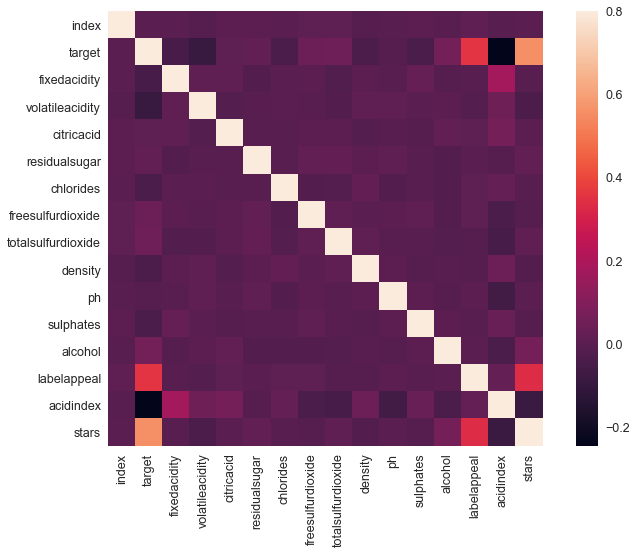

In [85]:
#correlation matrix
corr_matrix = eda_train.corr()
f, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(corr_matrix, vmax = .8, square = True)

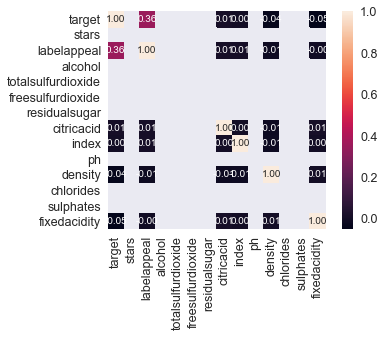

In [86]:
eda_train["target"] = eda_train["target"].fillna(0)
corr_matrix = eda_train.corr()
columns = corr_matrix.nlargest(14, 'target')['target'].index
corr_m = np.corrcoef(eda_train[columns].values.T)
sns.set(font_scale = 1.25)
heat_map = sns.heatmap(corr_m, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = columns.values, xticklabels = columns.values)
plt.show()

In [87]:
eda_train.target.value_counts()

4    3177
0    2734
3    2611
5    2014
2    1091
6     765
1     244
7     142
8      17
Name: target, dtype: int64

Text(0.5,1,'Target')

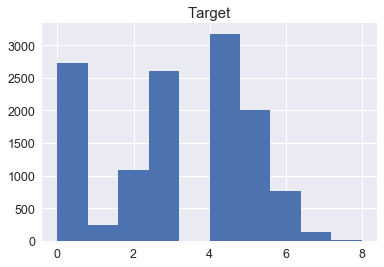

In [88]:
ax1 = eda_train.target.hist()
ax1.set_title("Target")

In [89]:
#Count of missing values
eda_train.isnull().sum(axis=0)

index                    0
target                   0
fixedacidity             0
volatileacidity          0
citricacid               0
residualsugar          616
chlorides              638
freesulfurdioxide      647
totalsulfurdioxide     682
density                  0
ph                     395
sulphates             1210
alcohol                653
labelappeal              0
acidindex                0
stars                 3359
dtype: int64

In [90]:
def find_outliers(dataSeries):
    quants = dataSeries.quantile([.25, .75])
    iqr = quants[.75] - quants[.25]
    
    lower = quants[.25] - 3 * iqr
    upper = quants[.75] + 3 * iqr
    return [value for value in dataSeries if value < lower or value > upper]


Component	Typical Concentration, mg/L

Acetaldehyde	70

Glycerol	7000

Higher Alcohols	500

Sorbitol & Mannitol	300

Sulfites	80

Acid (fixed) 6000

Amino Acids	550

Esters	60

Minerals	1200

Phenols	1800

Sugar	750

Volatile Acidity	400

<img src='Wine_compistion_image.gif'></img>

### Fixed Acidity

Acids are major wine constituents and contribute greatly to its taste.  In fact, acids impart the sourness or tartness that is a fundamental feature in wine taste.  Wines lacking in acid are usually "flat" in taste.  Chemically the acids influence the color, stability to oxidation, and the overall lifespan of a wine. The acids may arise in the grapes themselves and carry over into wines or they may arise from the formentation process. 

There are two types of acidity, volatile acidity or fixed acidity. The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.  Their respective levels found in wine can vary greatly but in general one would expect to see 1,000 to 4,000 mg/L. Wines produced from cool climate grapes are high in acidity and thus taste sour.  These high-acid wines can be treated to reduce the acidity, either by neutralizing agents, or by malo-lactic fermentation. 

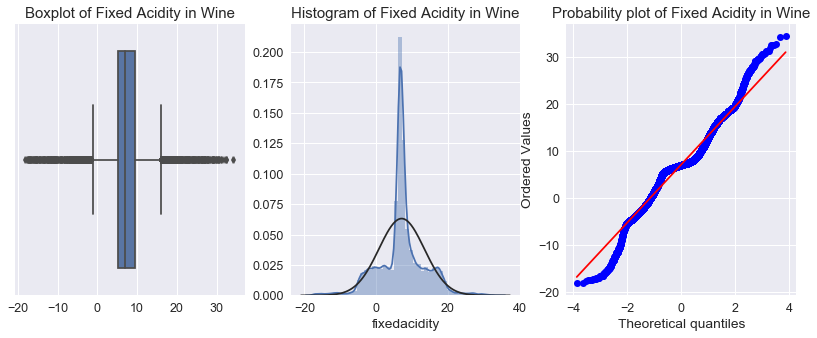

Outliers for Fixed Acidity:  [-17.2, 28.9, 24.7, 23.6, -11.7, -10.5, -11.0, -14.4, -8.2, -15.7, 25.2, -10.5, 27.1, 26.8, -17.7, -8.4, 25.8, -9.3, 30.3, -10.8, 23.1, -15.4, 30.5, 22.7, -17.0, 26.6, -12.2, -11.9, -10.6, 32.4, -8.9, 22.8, -12.1, 26.6, -8.2, -13.4, 25.6, -12.5, -13.8, 26.3, -11.1, 22.6, -10.7, -10.1, 26.3, -8.1, -15.2, 27.8, -7.7, -8.1, -15.7, -9.0, 22.5, -12.5, -9.1, 23.1, 27.1, -10.8, -9.2, 23.2, -16.0, 24.0, 30.5, 23.1, -10.0, 23.9, -11.7, -13.9, -8.8, -7.7, -10.9, 25.5, 26.2, -17.5, -14.9, 27.7, -17.0, 30.0, -15.5, -13.3, -10.9, 27.9, -15.9, -11.4, 26.6, -15.2, 26.4, 22.6, 24.6, -13.9, -12.8, -15.5, -8.5, 24.7, 25.6, 22.9, 24.6, -11.8, -12.9, -9.9, -11.0, 28.3, 24.4, 25.4, 29.5, 30.2, 25.7, -9.9, 22.8, 25.6, 26.4, 26.4, -13.7, -10.6, 25.7, 26.5, -17.0, 25.5, 23.4, 29.4, 23.9, 22.7, -12.4, -13.2, -11.8, -16.7, -9.1, 27.7, 22.5, 23.4, -12.1, -11.2, 24.2, -12.3, 29.1, -12.5, 27.9, -8.4, -14.5, -12.5, -11.7, -12.6, 27.8, 23.0, -7.8, -14.9, 24.0, 24.4, -13.4, -15.9, -16.0, 

In [91]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.fixedacidity])
axs1.set_title('Boxplot of Fixed Acidity in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.fixedacidity, fit=norm, hist=True)
axs2.set_title("Histogram of Fixed Acidity in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.fixedacidity, plot=plt)
ax3.set_title("Probability plot of Fixed Acidity in Wine")

plt.show()

print("Outliers for Fixed Acidity: ", find_outliers(eda_train.fixedacidity))

In [92]:
print(eda_train.fixedacidity.median())
print(eda_train.fixedacidity.mean())

6.9
7.075717076983196


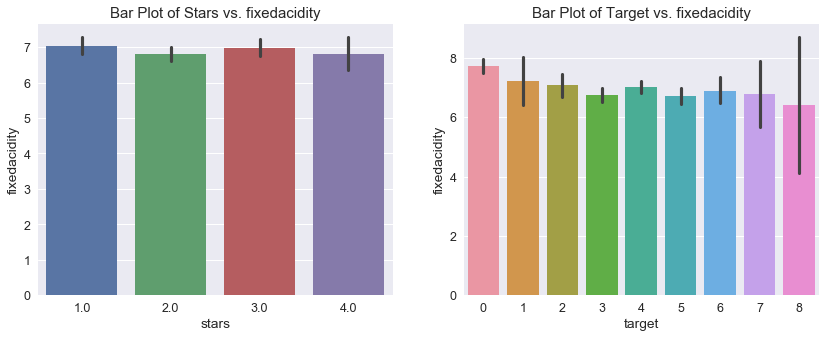

In [93]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
axs1 = sns.barplot(x="stars", y="fixedacidity", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. fixedacidity')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="fixedacidity", data=eda_train);
axs1.set_title('Bar Plot of Target vs. fixedacidity')

#var = 'fixedacidity'
#data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="stars", y=var, data=data)
#fig.set_title('Box Plot of Stars vs. fixedacidity')
#fig.axis(ymin=-20, ymax=35);
plt.show()

### Volatile Acidity

Volatile acidity refers to the steam distillable acids present in wine, primarily acetic acid but also lactic, formic, butyric, and propionic acids.  Commonly, these acids are measured by Cash Still, though now they can be measured by gas chromatography, HPLC or enzymatic methods.  The average level of acetic acid in a new dry table wine is less than 400 mg/L, though levels may range from undetectable up to 3g/L. While acetic acid is generally considered a spoilage product (vinegar), some winemakers seek a low or barely detectible level of acetic acid to add to the perceived complexity of a wine.  In addition, the production of acetic acid will result in the concomitant formation of other, sometimes unpleasant, aroma compounds.

U.S. legal limits of Volatile Acidity:

Red Table Wine 1.2 g/L

White Table Wine 1.1 g/L

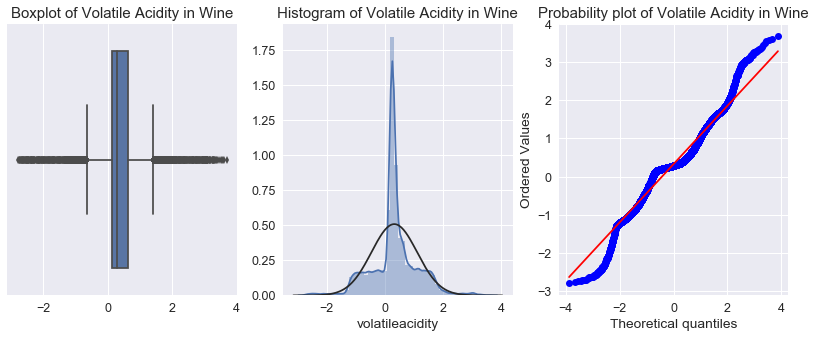

Outliers for Volatile Acidity:  [2.64, 2.21, -2.46, 2.75, 3.06, 3.06, -2.54, -2.39, 2.37, 2.68, 3.18, -1.65, -1.64, 2.955, 2.81, 2.81, -2.65, 2.44, -1.89, 3.28, -2.19, 3.11, -1.74, 3.06, 2.63, 3.25, 2.83, -2.14, 2.32, 3.31, 2.48, -2.54, -1.89, 2.65, 2.33, 3.26, -1.79, -2.46, -2.52, -1.91, 3.06, 2.35, -1.5, 3.05, 2.46, 2.2, -1.71, 2.535, -2.64, 2.95, 3.5, -1.81, 3.03, 2.52, 3.07, -1.91, 3.06, -2.71, -2.15, -1.5, -1.51, -2.7, 2.82, -2.43, -2.59, 3.08, -1.435, 2.66, 3.0, 2.43, 2.93, 2.57, 2.3, -2.36, -2.45, -2.19, -2.42, 2.91, -2.31, -1.99, 2.65, 2.95, 2.34, 2.19, 2.65, 2.69, 2.34, -1.69, 2.47, -2.47, 2.225, -2.0, 2.58, 3.0, 2.86, -2.6, 2.95, 2.24, 2.21, 3.07, 2.62, 2.18, 2.35, 2.69, 2.27, -2.49, 2.98, -1.96, -1.76, -1.96, 2.465, -2.73, 2.84, -1.56, 2.64, 2.36, 2.6, 2.36, 3.04, 3.24, 3.01, 2.45, -2.72, 2.39, 2.205, 2.65, -1.55, 3.02, 3.09, -2.52, -1.75, 2.79, -2.04, -2.48, 2.91, 2.625, -1.43, -1.85, -2.5, -2.24, 2.98, 2.75, -1.66, -2.13, 2.74, 2.4, -2.37, 2.81, -1.74, 2.39, 3.26, 2.65, -2

In [94]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.volatileacidity])
axs1.set_title('Boxplot of Volatile Acidity in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.volatileacidity, fit=norm, hist=True)
axs2.set_title("Histogram of Volatile Acidity in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.volatileacidity, plot=plt)
ax3.set_title("Probability plot of Volatile Acidity in Wine")

plt.show()

print("Outliers for Volatile Acidity: ", find_outliers(eda_train.volatileacidity))

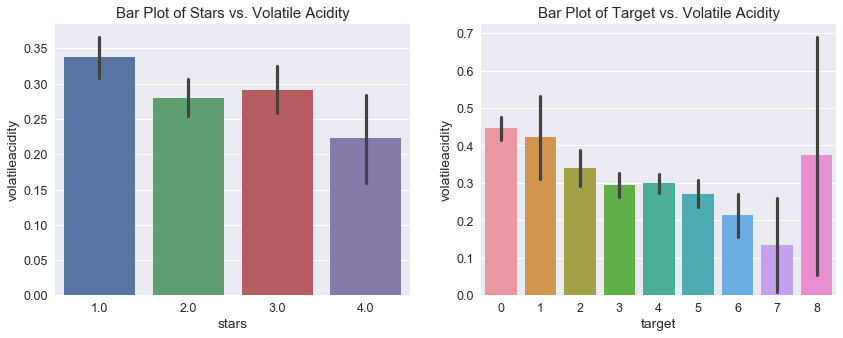

In [95]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
axs1 = sns.barplot(x="stars", y="volatileacidity", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. Volatile Acidity')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="volatileacidity", data=eda_train);
axs1.set_title('Bar Plot of Target vs. Volatile Acidity')

#var = 'volatileacidity'
#data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="stars", y=var, data=data)
#fig.set_title('Box Plot of Stars vs. Volatile Acidity')
#fig.axis(ymin=-3, ymax=4);

plt.show()

In [96]:
eda_train.volatileacidity.median()
print(eda_train.volatileacidity.median())
print(eda_train.volatileacidity.mean())

0.28
0.32410394685423993


### Citric Acid

The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.  Their respective levels found in wine can vary greatly but in general one would expect to see 1,000 to 4,000 mg/L tartaric acid, 0 to 8,000 mg/L malic acid, 0 to 500 mg/L citric acid, and 500 to 2,000 mg/L succinic acid.  All of these acids originate in grapes with the exception of succinic acid, which is produced by yeast during the fermentation process.  Grapes also contain ascorbic acid (Vitamin C), but this is lost during fermentation.  It is also legal to add fumaric acid as a preservative.  


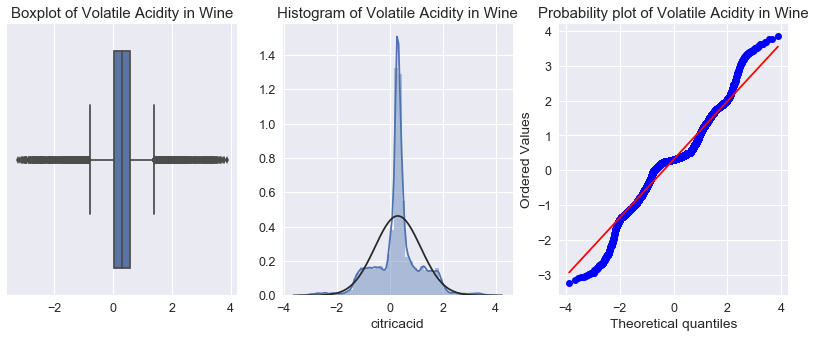

Outliers for Citric Acid:  [2.95, -2.75, 2.32, 3.26, -2.16, -2.08, 3.09, -2.25, -2.55, 3.39, 3.68, -2.39, -2.24, -2.09, 3.33, 2.73, -2.21, -1.62, 2.46, -1.78, 2.64, -2.43, -2.4, -2.52, 3.12, 3.22, 3.17, 2.48, 3.19, 2.27, 2.27, 2.48, 2.34, 2.58, 2.75, -1.81, -1.66, -2.43, -2.36, -1.94, 3.43, 2.88, -2.98, 2.38, 2.31, -2.52, -1.97, -2.22, -2.59, 2.97, -1.76, 2.44, 2.58, 3.19, 3.46, 2.99, -1.93, -2.81, -2.69, 3.44, 2.49, -1.65, 2.42, 3.01, -2.16, -1.96, 3.52, -2.43, 2.62, -2.64, 2.47, 3.12, 3.19, -1.88, -2.73, -2.53, -2.0, 3.14, -1.66, -2.33, -2.95, 2.58, 3.43, 2.62, 3.29, 2.27, -1.97, 2.38, -2.42, 2.57, -2.76, -2.79, -2.73, 2.66, 2.25, -2.71, 3.63, 2.54, -1.66, -2.92, 3.09, 2.48, 2.38, 2.35, 2.66, -2.17, -1.72, -1.89, 3.5, -1.7, -2.57, -1.68, 3.07, -2.18, 2.68, 3.26, -2.66, -2.94, -2.62, -2.33, -1.75, 3.37, -2.58, 3.52, -2.81, -2.68, 2.76, -2.32, 3.0, 3.28, 2.57, 2.45, 3.22, 2.48, -2.04, -2.95, 2.39, -1.64, -2.51, -2.18, 2.99, -2.7, -2.06, 2.27, 2.77, -2.01, -3.03, 2.6, 2.51, -2.7, 3.06, 

In [97]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.citricacid])
axs1.set_title('Boxplot of Volatile Acidity in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.citricacid, fit=norm, hist=True)
axs2.set_title("Histogram of Volatile Acidity in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.citricacid, plot=plt)
ax3.set_title("Probability plot of Volatile Acidity in Wine")

plt.show()

print("Outliers for Citric Acid: ", find_outliers(eda_train.citricacid))

In [98]:
eda_train.citricacid.median()
print(eda_train.citricacid.median())
print(eda_train.citricacid.mean())

0.31
0.3084126611957796


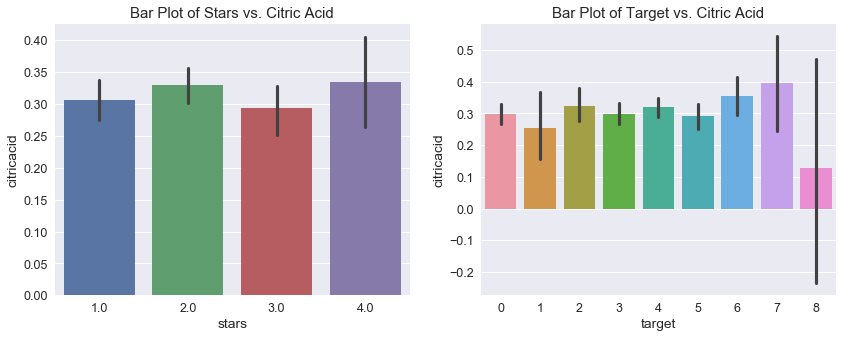

In [99]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
axs1 = sns.barplot(x="stars", y="citricacid", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. Citric Acid')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="citricacid", data=eda_train);
axs1.set_title('Bar Plot of Target vs. Citric Acid')


#var = 'citricacid'
#data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="stars", y=var, data=data)
#fig.set_title('Box Plot of Stars vs. Citric Acid')
#fig.axis(ymin=-4, ymax=4);

plt.show()

### fixedacidity vs citricacid

Text(0.5,1,'fixedacidity vs citricacid')

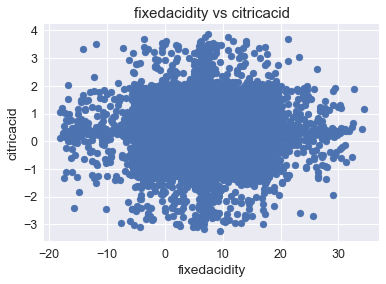

In [100]:
plt.scatter(eda_train.fixedacidity, eda_train.citricacid)
plt.ylabel('citricacid')
plt.xlabel('fixedacidity')
plt.title('fixedacidity vs citricacid')

### Residual Sugar

Residual sugar is the sugar from the grapes that’s left over after fermentation; more residual sugar makes a sweet wine, and the absence of residual sugar makes a dry wine. The term "dry", in reference to fermentation technically means that there is less than 1% residual sugar in the wine. During fermentation the yeast consumes the sugar in the grape juice producing alcohol and CO2. The yeast will continue this process until all of the grape sugar has been used up at which point having no food source, the yeast cells die and become the lees. Wine is fermented to dryness because, among other things, leaving sugar in it would make it microbially unstable. Residual sugar in a wine which contains less than 16% alcohol creates a substrate for possible yeast growth, making the wine potentially unstable or liable to re-ferment in the bottle.

Categories of Wine Sweetness

Dry White 0.1 – 0.2% 1-2 g/L

Dry Red 0.2 – 0.3% 2-3 g/L ***

Off-Dry 1.0 – 3.0% 10-30 g/L

Sweet > 3% > 30 g/L

Port/Sherry 5-15% 50-150 g/L

Dessert/ 10-20% 100-200 g/L


ref: http://www.moundtop.com/pdf/Winemaking-ResidualSugar.pdf

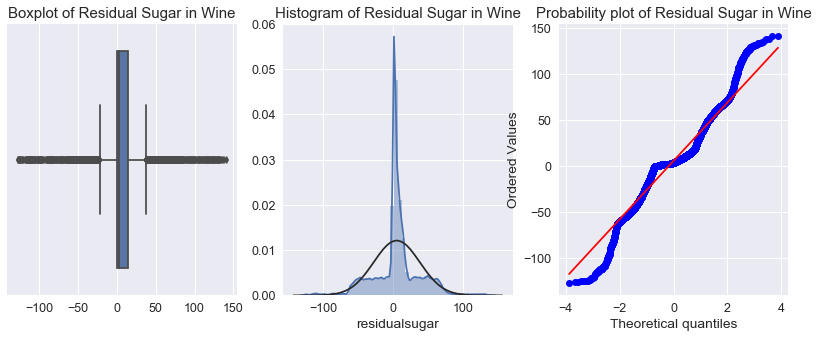

In [101]:
eda_train.residualsugar = eda_train.residualsugar.fillna(0)
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.residualsugar])
axs1.set_title('Boxplot of Residual Sugar in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.residualsugar, fit=norm, hist=True)
axs2.set_title("Histogram of Residual Sugar in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.residualsugar, plot=plt)
ax3.set_title("Probability plot of Residual Sugar in Wine")

plt.show()

#print("Outliers for Residual Sugar: ", find_outliers(eda_train.residualsugar))

In [102]:
eda_train.residualsugar.median()
print(eda_train.residualsugar.median())
print(eda_train.residualsugar.mean())

2.9
5.157854630715123


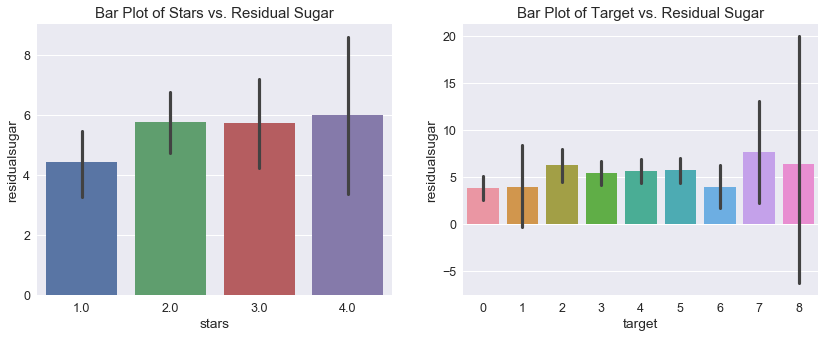

In [103]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
axs1 = sns.barplot(x="stars", y="residualsugar", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. Residual Sugar')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="residualsugar", data=eda_train);
axs1.set_title('Bar Plot of Target vs. Residual Sugar')


#var = 'residualsugar'
#data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="stars", y=var, data=data)
#fig.set_title('Box Plot of Stars vs. Residual Sugar')
#fig.axis(ymin=-150, ymax=150);

plt.show()

### Chlorides

Salty is not a common wine descriptor. That it’s also not a positive one probably goes without saying. Salinity is a concern in dry locations when frequent irrigation increases soil salinity, which increases wine salinity.The amount of chloride in wine is influenced by both the terroir and type of grape, and the importance of quantification lies in the fact that wine flavor is strongly impacted by this particular ion, which, in high concentration, gives the wine an undesirable salty taste and significantly decreases its market appeal. Quantification also helps determining wine origin and different grape varieties used in the wine, thus justifying the difference in wine regulations from country to country.

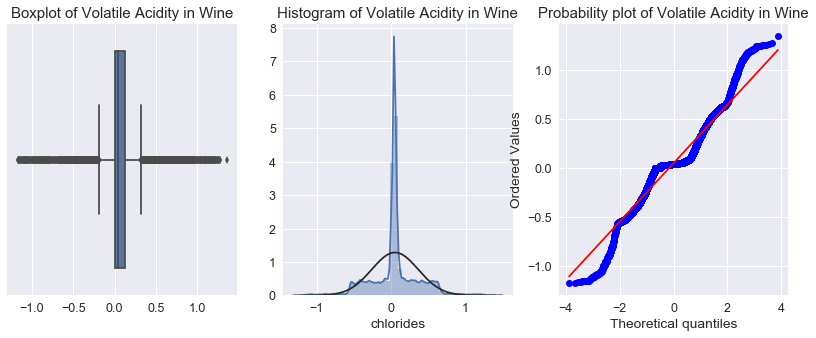

In [104]:
eda_train.chlorides = eda_train.chlorides.fillna(0)
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.chlorides])
axs1.set_title('Boxplot of Volatile Acidity in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.chlorides, fit=norm, hist=True)
axs2.set_title("Histogram of Volatile Acidity in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.chlorides, plot=plt)
ax3.set_title("Probability plot of Volatile Acidity in Wine")

plt.show()

#print("Outliers for Citric Acid: ", find_outliers(eda_train.chlorides))

In [105]:
eda_train.chlorides.median()
print(eda_train.chlorides.median())
print(eda_train.chlorides.mean())

0.044000000000000004
0.05208886283704573


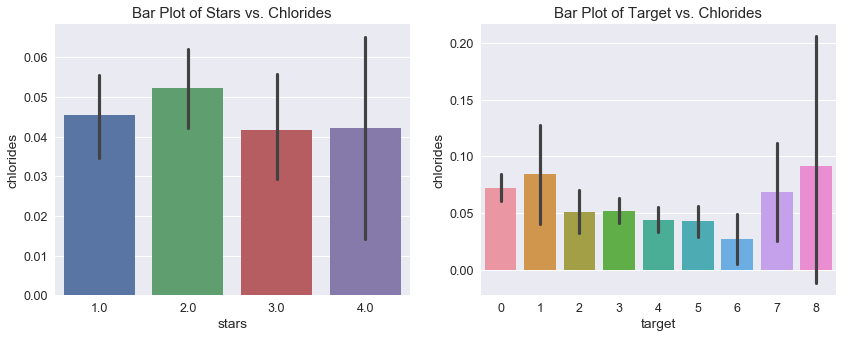

In [106]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
axs1 = sns.barplot(x="stars", y="chlorides", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. Chlorides')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="chlorides", data=eda_train);
axs1.set_title('Bar Plot of Target vs. Chlorides')

#var = 'chlorides'
#data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="stars", y=var, data=data)
#fig.set_title('Box Plot of Stars vs. Chlorides')
#fig.axis(ymin=-2, ymax=2);
plt.show()

### freesulfurdioxide

Sulfur dioxide (SO2) is frequently added to must and juice as a preservative to prevent bacterial growth and slow down the process of oxidation by inhibiting oxidative enzymes. SO2 also improves the taste and retains the wine's fruity flavors and freshness of aroma. Two classes of sulfites are found in wine: free and bound. The free sulfites are those available to react and thus exhibit both germicidal and antioxidant properties. The bound sulfites are those that have reacted (both reversibly and irreversibly) with other molecules within the wine medium. The sum of the free and bound sulfites defines the total sulfite concentration.

https://www.practicalwinery.com/janfeb09/page5.htm

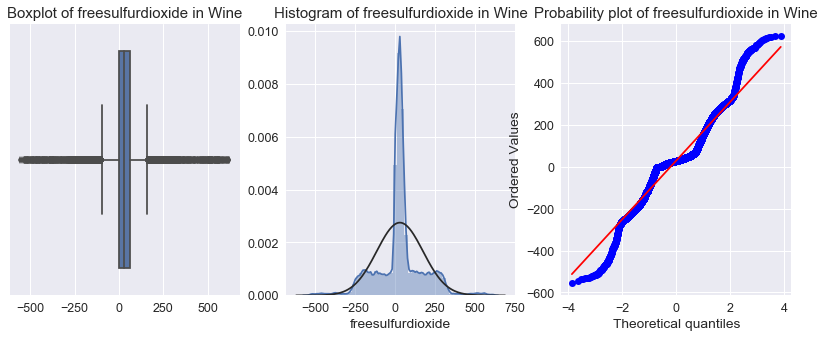

28.0

In [107]:
eda_train.freesulfurdioxide = eda_train.freesulfurdioxide.fillna(0)
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.freesulfurdioxide])
axs1.set_title('Boxplot of freesulfurdioxide in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.freesulfurdioxide, fit=norm, hist=True)
axs2.set_title("Histogram of freesulfurdioxide in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.freesulfurdioxide, plot=plt)
ax3.set_title("Probability plot of freesulfurdioxide in Wine")

plt.show()

#print("Outliers for Citric Acid: ", find_outliers(eda_train.chlorides))

eda_train.freesulfurdioxide.median()

In [108]:
print(eda_train.freesulfurdioxide.median())
print(eda_train.freesulfurdioxide.mean())

28.0
29.285814771395078


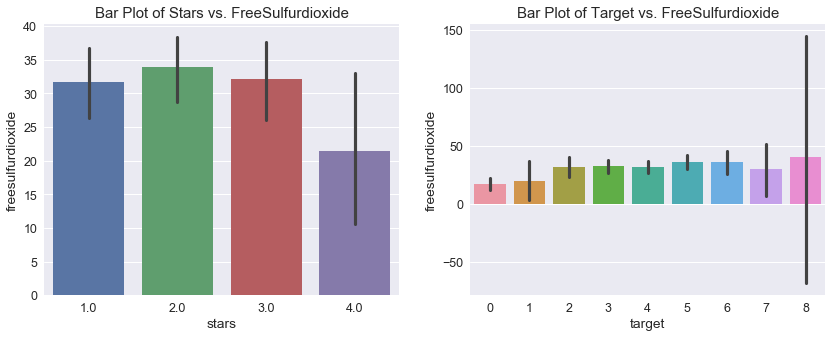

In [109]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
axs1 = sns.barplot(x="stars", y="freesulfurdioxide", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. FreeSulfurdioxide')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="freesulfurdioxide", data=eda_train);
axs1.set_title('Bar Plot of Target vs. FreeSulfurdioxide')

#var = 'freesulfurdioxide'
#data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="stars", y=var, data=data)
#fig.set_title('Box Plot of Stars vs. FreeSulfurdioxide')
#fig.axis(ymin=-600, ymax=650);

plt.show()

### totalsulfurdioxide

A level of 0.8 ppm molecular SO2 will slow down the growth of yeast and will prevent the growth of most other microbes. This level of sulfur dioxide will bind up most of the acetaldehyde in a wine and reduce any oxidation aroma considerably. Therefore, 0.8 ppm is a good target level for molecular SO2 immediately prior to bottling and will provide the maximum protection for the finished wine. However, sensitive tasters will be able to detect a slight burnt match aroma at 0.8 ppm SO2. This is usually not a problem however because few consumers will be able to detect it. Additionally if the wine is bottle-aged for a few months before consumption, the SO2 will decrease as more sulfites react with other chemical constituents in the wine and become bound. Thus, a wine bottled at 0.8 ppm will decrease to a lower level fairly quickly and there would be no detectable sulfur dioxide aroma.

Total SO2 should be kept below 110 ppm for table wines because, at higher levels, the wine can acquire off-flavors.

https://www.practicalwinery.com/janfeb09/page5.htm

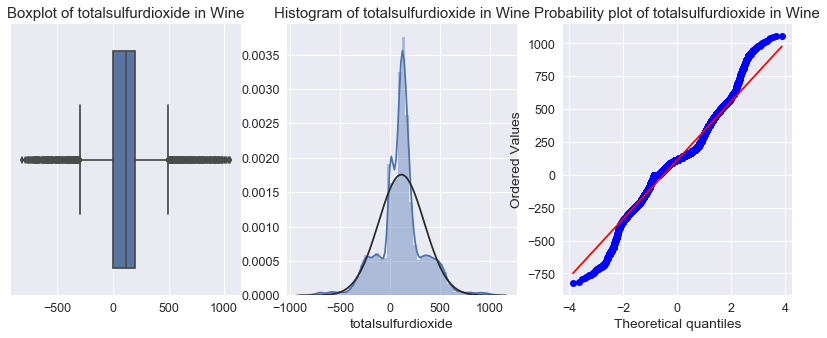

114.27991402891755

In [110]:
eda_train.totalsulfurdioxide = eda_train.totalsulfurdioxide.fillna(0)
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.totalsulfurdioxide])
axs1.set_title('Boxplot of totalsulfurdioxide in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.totalsulfurdioxide, fit=norm, hist=True)
axs2.set_title("Histogram of totalsulfurdioxide in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.totalsulfurdioxide, plot=plt)
ax3.set_title("Probability plot of totalsulfurdioxide in Wine")

plt.show()

#print("Outliers for Citric Acid: ", find_outliers(eda_train.chlorides))

eda_train.totalsulfurdioxide.mean()

In [111]:
print(eda_train.totalsulfurdioxide.median())
print(eda_train.totalsulfurdioxide.mean())

117.0
114.27991402891755


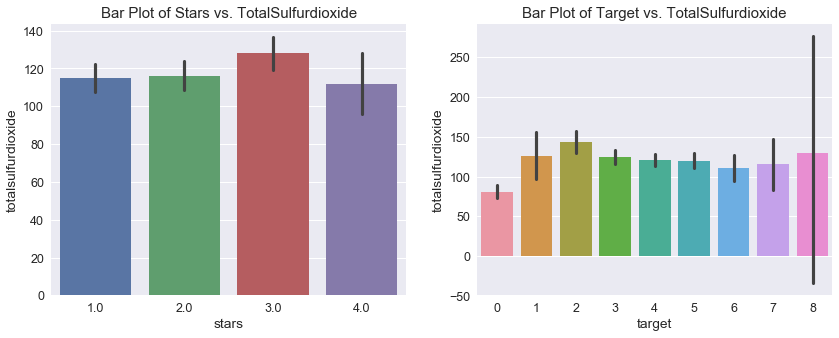

In [112]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
axs1 = sns.barplot(x="stars", y="totalsulfurdioxide", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. TotalSulfurdioxide')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="totalsulfurdioxide", data=eda_train);
axs1.set_title('Bar Plot of Target vs. TotalSulfurdioxide')


#var = 'totalsulfurdioxide'
#data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="stars", y=var, data=data)
#fig.set_title('Box Plot of Stars vs. TotalSulfurdioxide')
#fig.axis(ymin=-1000, ymax=1200);

plt.show()

### density

Density is defined as the mass, or weight, per volume of a material. In the case of liquids, density is often measured in units of g/mL. The density of wine is primarily determined by the concentration of alcohol, sugar, glycerol, and other dissolved solids. 

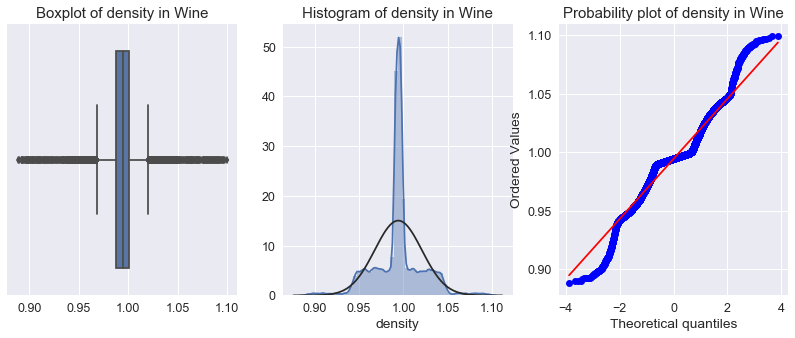

0.99449

In [113]:
eda_train.totalsulfurdioxide = eda_train.density.fillna(0)
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.density])
axs1.set_title('Boxplot of density in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.density, fit=norm, hist=True)
axs2.set_title("Histogram of density in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.density, plot=plt)
ax3.set_title("Probability plot of density in Wine")

plt.show()

eda_train.density.median()

In [114]:
print(eda_train.density.median())
print(eda_train.density.mean())

0.99449
0.994202718249316


### ph

The pH of a wine is critical not only to its flavor but to nearly every aspect of the wine. The pH is a logarithmic scale that measures the concentration of free hydrogen ions floating in wine. The stronger the acid the more hydrogen ions you’ll have so in essence it is a measurement of how strong an acid is. The pH value affects nearly every aspect of the wine. The pH affect flavor, aroma, color, tartrate precipitation, carbon dioxide absorption, malolactic fermentation, stability, ageablity, and fermentation rate. It can also affect the many chemical reactions that take place in a wine during and after fermentation. 

pH value in most wines fall between 3.0 and 3.6.

<img src="PH_scale_with_wine_highlighted.jpg"></img>

https://commons.wikimedia.org/wiki/File:PH_scale_with_wine_highlighted.jpg

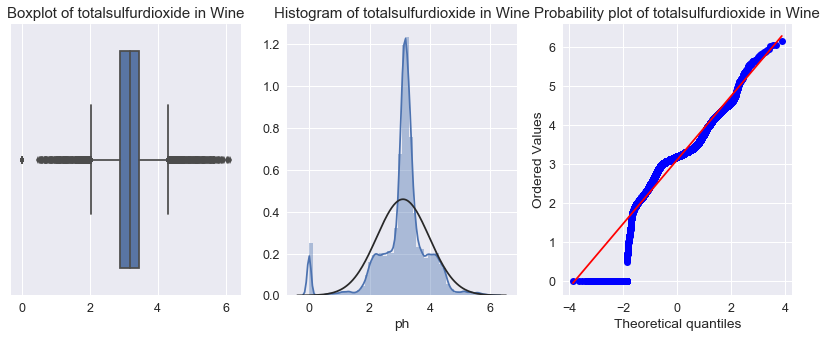

3.19

In [115]:
eda_train.ph = eda_train.ph.fillna(0)
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.ph])
axs1.set_title('Boxplot of totalsulfurdioxide in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.ph, fit=norm, hist=True)
axs2.set_title("Histogram of totalsulfurdioxide in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.ph, plot=plt)
ax3.set_title("Probability plot of totalsulfurdioxide in Wine")

plt.show()

#print("Outliers for Citric Acid: ", find_outliers(eda_train.chlorides))

eda_train.ph.median()

In [116]:
print(eda_train.ph.median())
print(eda_train.ph.mean())

3.19
3.1086041422430633


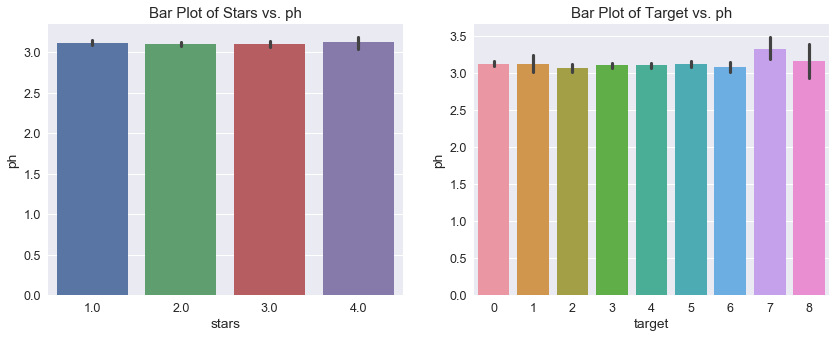

In [117]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
axs1 = sns.barplot(x="stars", y="ph", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. ph')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="ph", data=eda_train);
axs1.set_title('Bar Plot of Target vs. ph')

#var = 'ph'
#data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="stars", y=var, data=data)
#fig.set_title('Box Plot of Stars vs. ph')
#fig.axis(ymin=-1, ymax=7);

plt.show()

### sulphates

Sulfites or sulfur dioxide is a fruit preservative widely used in dried fruits as well as wine. Sulphur dioxide has an unpleasant smell, like that of a struck match, detectable at very low concentrations. Sulphur dioxide can cause potentially fatal allergic reactions and has been linked with numerous other health problems, including hangover.

The levels in wine average 80 mg/liter, or about 10 mg in a typical glass of wine, with slightly higher amounts in white versus red. Wines with lower acidity need more sulfur than higher acidity wines. At pH 3.6 and above, the sulfites needed is much higher because it’s an exponential ratio. Wines with more color (i.e. red wines) need less sulfur than clear wines (i.e. white wines). Wines with higher sugar content tend to need more sulfur to prevent secondary fermentation of the remaining sugar.

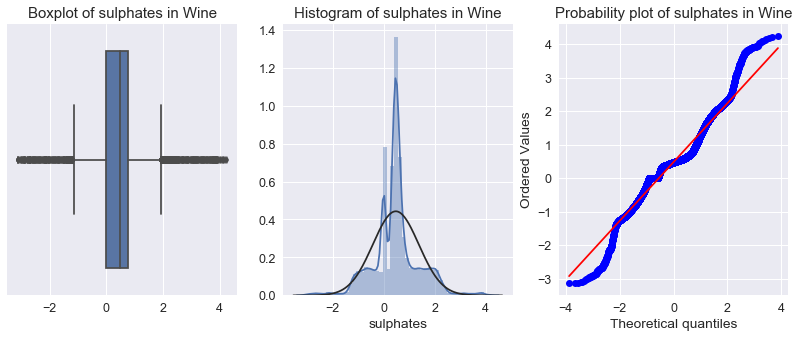

0.47

In [118]:
eda_train.sulphates = eda_train.sulphates.fillna(0)
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.sulphates])
axs1.set_title('Boxplot of sulphates in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.sulphates, fit=norm, hist=True)
axs2.set_title("Histogram of sulphates in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.sulphates, plot=plt)
ax3.set_title("Probability plot of sulphates in Wine")

plt.show()

#print("Outliers for Citric Acid: ", find_outliers(eda_train.chlorides))

eda_train.sulphates.median()

In [119]:
print(eda_train.sulphates.median())
print(eda_train.sulphates.mean())

0.47
0.47726377491207506


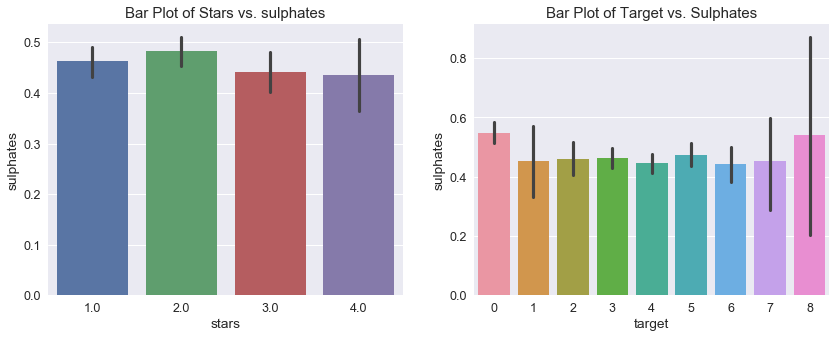

In [120]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
axs1 = sns.barplot(x="stars", y="sulphates", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. sulphates')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="sulphates", data=eda_train);
axs1.set_title('Bar Plot of Target vs. Sulphates')

#var = 'sulphates'
#data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="stars", y=var, data=data)
#fig.axis(ymin=-4, ymax=5);

plt.show()

### alcohol

The amount of alcohol produced during fermentation is dependent of the genus, specie and strain of yeast, the specific nutrient status such as amino acids and composition of the must and temperature, aeration and pH during fermentation. Higher alcohols can have an aromatic effect in wines and some higher alcohols can be considered positive and others can be considered negative to the aromatic wine profile. However, due to the concentration that are found in wines and its high threshold, higher alcohols does not have many sensory effects in wine.


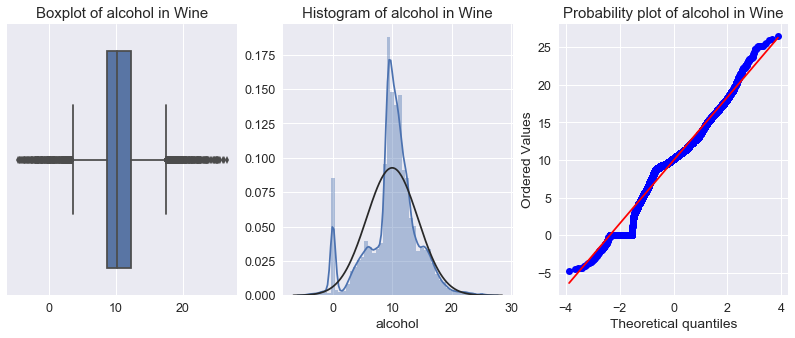

10.2

In [121]:
eda_train.alcohol = eda_train.alcohol.fillna(0)
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.alcohol])
axs1.set_title('Boxplot of alcohol in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.alcohol, fit=norm, hist=True)
axs2.set_title("Histogram of alcohol in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.alcohol, plot=plt)
ax3.set_title("Probability plot of alcohol in Wine")

plt.show()

#print("Outliers for Citric Acid: ", find_outliers(eda_train.chlorides))

eda_train.alcohol.median()

In [122]:
print(eda_train.alcohol.median())
print(eda_train.alcohol.mean())

10.2
9.953912205288184


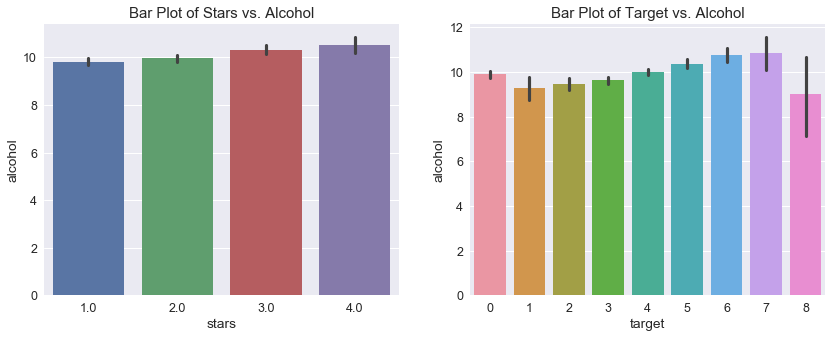

In [123]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
#axs1 = sns.barplot(x="target", y="alcohol", data=eda_train);
axs1 = sns.barplot(x="stars", y="alcohol", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. Alcohol')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="alcohol", data=eda_train);
axs1.set_title('Bar Plot of Target vs. Alcohol')

#var = 'alcohol'
#data = pd.concat([eda_train['target'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="target", y=var, data=data)
#fig.set_title('Box Plot of Target vs. Alcohol')
#fig.axis(ymin=-7, ymax=30);

plt.show()

### labelappeal

In [124]:
eda_train.labelappeal.value_counts()

 0    5617
-1    3136
 1    3048
-2     504
 2     490
Name: labelappeal, dtype: int64

In [125]:
eda_train.stars.value_counts()

2.0    3570
1.0    3042
3.0    2212
4.0     612
Name: stars, dtype: int64

In [126]:
eda_train_1 = eda_train.copy()
eda_train_1 = eda_train_1[['labelappeal','stars']]

In [127]:
eda_train_1.apply(pd.Series.value_counts)

,labelappeal,stars
-2.0,504.0,NaN
-1.0,3136.0,NaN
0.0,5617.0,NaN
1.0,3048.0,3042.0
2.0,490.0,3570.0
3.0,NaN,2212.0
4.0,NaN,612.0


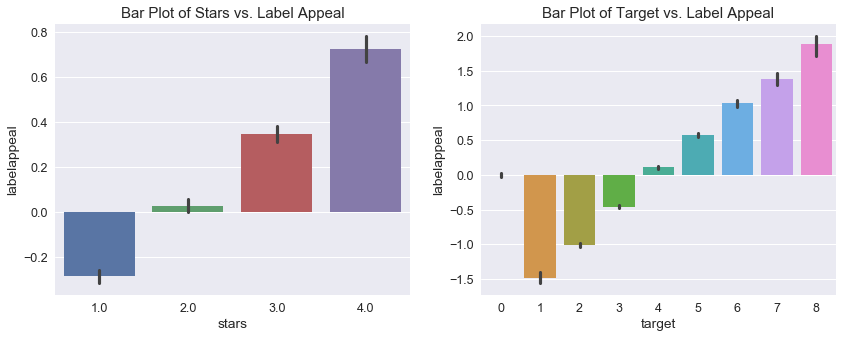

In [128]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
axs1 = sns.barplot(x="stars", y="labelappeal", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. Label Appeal')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="labelappeal", data=eda_train);
axs1.set_title('Bar Plot of Target vs. Label Appeal')


#var = 'labelappeal'
#data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="stars", y=var, data=data)
#fig.set_title('Box Plot of Stars vs. Label Appeal')
#fig.axis(ymin=-3, ymax=3);

plt.show()

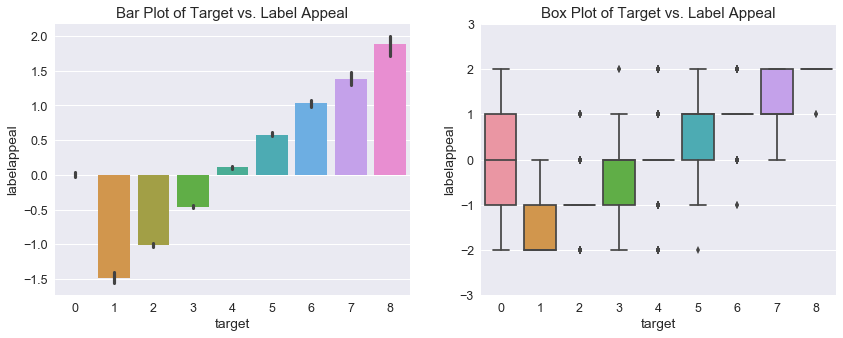

In [129]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
#axs1 = sns.barplot(x="target", y="labelappeal", data=eda_train);
axs1 = sns.barplot(x="target", y="labelappeal", data=eda_train);
axs1.set_title('Bar Plot of Target vs. Label Appeal')

ax2 = plt.subplot(1, 2, 2)
var = 'labelappeal'
data = pd.concat([eda_train['target'], eda_train[var]], axis=1)
fig = sns.boxplot(x="target", y=var, data=data)
fig.set_title('Box Plot of Target vs. Label Appeal')
fig.axis(ymin=-3, ymax=3);
plt.show()

### acidindex

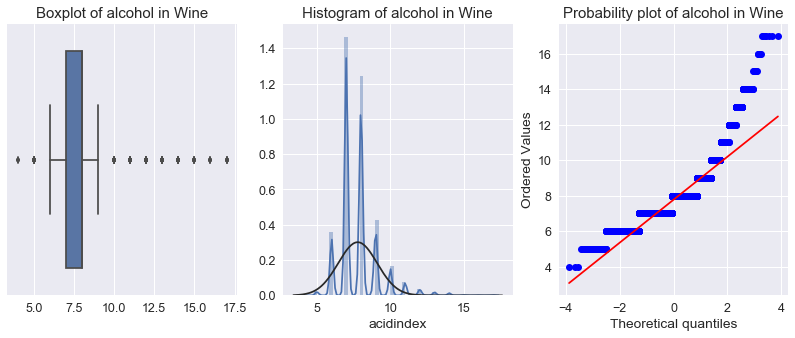

7.772723720203205

In [130]:
eda_train.acidindex = eda_train.acidindex.fillna(0)
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 3, 1)
axs1 = sns.boxplot([eda_train.acidindex])
axs1.set_title('Boxplot of alcohol in Wine')

ax2 = plt.subplot(1, 3, 2)
axs2 = sns.distplot(eda_train.acidindex, fit=norm, hist=True)
axs2.set_title("Histogram of alcohol in Wine")

ax3 = plt.subplot(1, 3, 3)
axs3 = stats.probplot(eda_train.acidindex, plot=plt)
ax3.set_title("Probability plot of alcohol in Wine")

plt.show()

#print("Outliers for Citric Acid: ", find_outliers(eda_train.chlorides))

eda_train.acidindex.mean()

In [131]:
print(eda_train.acidindex.median())
print(eda_train.acidindex.mean())

8.0
7.772723720203205


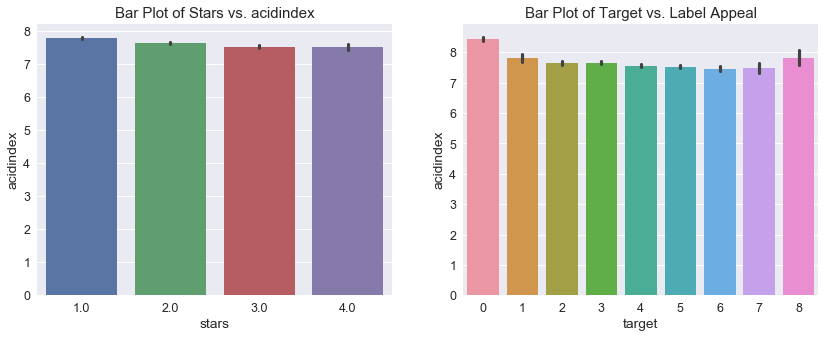

In [132]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
axs1 = sns.barplot(x="stars", y="acidindex", data=eda_train);
axs1.set_title('Bar Plot of Stars vs. acidindex')

ax2 = plt.subplot(1, 2, 2)
axs1 = sns.barplot(x="target", y="acidindex", data=eda_train);
axs1.set_title('Bar Plot of Target vs. Label Appeal')

#var = 'acidindex'
#data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
#fig = sns.boxplot(x="stars", y=var, data=data)
#fig.axis(ymin=3, ymax=17);

plt.show()

### Stars

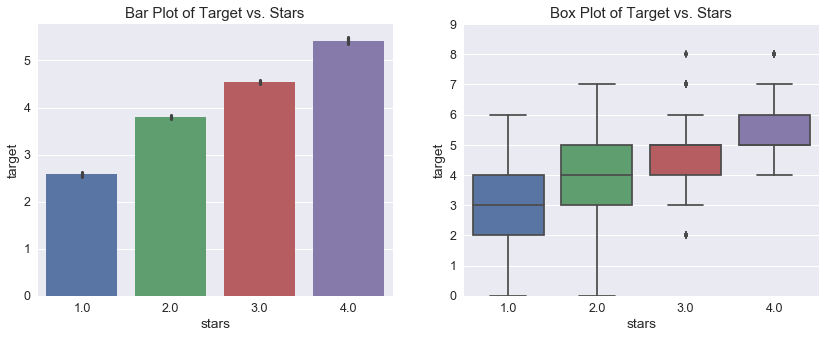

In [133]:
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
#axs1 = sns.barplot(x="target", y="stars", data=eda_train);
axs1 = sns.barplot(x="stars", y="target", data=eda_train);
axs1.set_title('Bar Plot of Target vs. Stars')

ax2 = plt.subplot(1, 2, 2)
var = 'target'
data = pd.concat([eda_train['stars'], eda_train[var]], axis=1)
fig = sns.boxplot(x="stars", y=var, data=data)
fig.set_title('Box Plot of Target vs. Stars')
fig.axis(ymin=0, ymax=9);
plt.show()

In [134]:
print("Mean value for Target: ", eda_train.target.mean())
print("Variance value for Target: ", eda_train.target.var())

Mean value for Target:  3.0290738569753812
Variance value for Target:  3.710894522839234


# Data Preparation

In [135]:
train1 = train.copy()
test1 = test.copy()

In [136]:
naColCount = train1.isnull().sum()
naColCount

index                    0
target                   0
fixedacidity             0
volatileacidity          0
citricacid               0
residualsugar          616
chlorides              638
freesulfurdioxide      647
totalsulfurdioxide     682
density                  0
ph                     395
sulphates             1210
alcohol                653
labelappeal              0
acidindex                0
stars                 3359
dtype: int64

In [137]:
QRT_1 = 0.99
QRT_2 = 0.01
QRT_3 = 0.95
QRT_4 = 0.05

def replace_outliers_with_q1_q2(series1):
    newSeries = series1.copy()
    series2 = series1.copy()
    for val in range(0, len(series1)):
        if series1[val] > series2.quantile(QRT_1):
            newSeries[val] = series2.quantile(QRT_1)
        
        if series1[val] < series2.quantile(QRT_2):
            newSeries[val] = series2.quantile(QRT_2)
    
    return newSeries

def replace_outliers_with_q3_q4(series1):
    newSeries = series1.copy()
    series2 = series1.copy()
    for val in range(0, len(series1)):
        if series1[val] > series2.quantile(QRT_3):
            newSeries[val] = series2.quantile(QRT_3)
        
        if series1[val] < series2.quantile(QRT_4):
            newSeries[val] = series2.quantile(QRT_4)
    
    return newSeries

In [138]:
naColNames = train1.isnull().any()
naColNames

index                 False
target                False
fixedacidity          False
volatileacidity       False
citricacid            False
residualsugar          True
chlorides              True
freesulfurdioxide      True
totalsulfurdioxide     True
density               False
ph                     True
sulphates              True
alcohol                True
labelappeal           False
acidindex             False
stars                  True
dtype: bool

In [139]:
value_count_df = train[['labelappeal','stars']]
value_count_df.apply(pd.Series.value_counts)

,labelappeal,stars
-2.0,504.0,NaN
-1.0,3136.0,NaN
0.0,5617.0,NaN
1.0,3048.0,3042.0
2.0,490.0,3570.0
3.0,NaN,2212.0
4.0,NaN,612.0


In [140]:
pd.crosstab(index=train["stars"], columns=train["labelappeal"])

labelappeal,-2,-1,0,1,2
stars,,,,,
1.0,203,1008,1334,448,49
2.0,70,849,1669,873,109
3.0,21,262,1011,766,152
4.0,0,29,192,310,81


### 40.28 percent of LabelAppeal = -2 had a STARS rating of 1, so we would impute STARS = 1 for any observation that was missing its STARS data but had LabelAppeal = -2. 

In [141]:
#train1=train1.replace({'residualsugar': {np.NaN : 5}})
train1['IMP_residualsugar'] = train1['residualsugar'].replace({np.NaN: 5}).astype(int)
train1['m_residualsugar'] = (train1['IMP_residualsugar'] == 5).astype(int)

#train1=train1.replace({'chlorides': {np.NaN : 0}})
train1['IMP_chlorides'] = train1['chlorides'].replace({np.NaN: 0}).astype(int)
train1['m_chlorides'] = (train1['IMP_chlorides'] == 0).astype(int)


#train1=train1.replace({'freesulfurdioxide': {np.NaN : 31}})

#train1=train1.replace({'freesulfurdioxide': {np.NaN : 29}})
train1['IMP_freesulfurdioxide'] = train1['freesulfurdioxide'].replace({np.NaN: 31}).astype(int)
train1['m_freesulfurdioxide'] = (train1['IMP_freesulfurdioxide'] == 31).astype(int)


#train1=train1.replace({'totalsulfurdioxide': {np.NaN : 121}})

#train1=train1.replace({'totalsulfurdioxide': {np.NaN : 1}})
train1['IMP_totalsulfurdioxide'] = train1['totalsulfurdioxide'].replace({np.NaN: 121}).astype(int)
train1['m_totalsulfurdioxide'] = (train1['IMP_totalsulfurdioxide'] == 121).astype(int)


#train1=train1.replace({'ph': {np.NaN : 3}})
train1['IMP_ph'] = train1['ph'].replace({np.NaN: 3}).astype(int)
train1['m_ph'] = (train1['IMP_ph'] == 3).astype(int)


#train1=train1.replace({'sulphates': {np.NaN : 1}})
train1['IMP_sulphates'] = train1['sulphates'].replace({np.NaN: 1}).astype(int)
train1['m_sulphates'] = (train1['IMP_sulphates'] == 1).astype(int)


#train1=train1.replace({'alcohol': {np.NaN : 10}})
train1['IMP_alcohol'] = train1['alcohol'].replace({np.NaN: 10}).astype(int)
train1['m_alcohol'] = (train1['IMP_alcohol'] == 10).astype(int)


#train1['IMP_stars'] = train1['stars'].replace({np.NaN: 0}).astype(int)
#train1['m_stars'] = (train1['IMP_stars'] == 0).astype(int)
train1['IMP_stars'] = train1['stars'].replace({np.NaN: 1}).astype(int)
train1['m_stars'] = (train1['stars'].isnull()).astype(int)

train1['residualsugar'] = abs(train1.residualsugar) 
train1['chlorides'] = abs(train1.chlorides)
train1['freesulfurdioxide'] = abs(train1.freesulfurdioxide)
train1['totalsulfurdioxide'] = abs(train1.totalsulfurdioxide)
train1['ph'] = abs(train1.ph)
train1['sulphates'] = abs(train1.sulphates)
train1['fixedacidity'] = abs(train1.fixedacidity) 
train1['volatileacidity'] = abs(train1.volatileacidity)
train1['citricacid'] = abs(train1.citricacid)
train1['alcohol'] = abs(train1.alcohol) 
train1['IMP_residualsugar'] = abs(train1.IMP_residualsugar)
train1['IMP_chlorides'] = abs(train1.IMP_chlorides)
train1['IMP_freesulfurdioxide'] = abs(train1.IMP_freesulfurdioxide)
train1['IMP_totalsulfurdioxide'] = abs(train1.IMP_totalsulfurdioxide)
train1['IMP_ph'] = abs(train1.IMP_ph)
train1['IMP_sulphates'] = abs(train1.IMP_sulphates)
train1['IMP_alcohol'] = abs(train1.IMP_alcohol)
train1['IMP_stars'] = abs(train1.IMP_stars)

In [142]:
'''
for index, row in train.iterrows():
    #print(train['stars'][index])
    #print(train['labelappeal'][index])
    if stars_list[index]:
        if train1['labelappeal'][index] == 0:
            train1['IMP_stars'][index] = 2
            train1['m_stars'] = (train1['stars'] == 0).astype(int)
        else:
            train1['IMP_stars'][index] = 1
            train1['m_stars'] = (train1['stars'] == 0).astype(int)            

for index, row in test.iterrows():
    #print(train['stars'][index])
    #print(train['labelappeal'][index])
    if test_stars_list[index]:
        if test1['labelappeal'][index] == 0:
            test1['IMP_stars'][index] = 2
            test1['m_stars'] = (train1['stars'] == 0).astype(int)
        else:
            test1['IMP_stars'][index] = 1
            test1['m_stars'] = (train1['stars'] == 0).astype(int)            
'''

"\nfor index, row in train.iterrows():\n    #print(train['stars'][index])\n    #print(train['labelappeal'][index])\n    if stars_list[index]:\n        if train1['labelappeal'][index] == 0:\n            train1['IMP_stars'][index] = 2\n            train1['m_stars'] = (train1['stars'] == 0).astype(int)\n        else:\n            train1['IMP_stars'][index] = 1\n            train1['m_stars'] = (train1['stars'] == 0).astype(int)            \n\nfor index, row in test.iterrows():\n    #print(train['stars'][index])\n    #print(train['labelappeal'][index])\n    if test_stars_list[index]:\n        if test1['labelappeal'][index] == 0:\n            test1['IMP_stars'][index] = 2\n            test1['m_stars'] = (train1['stars'] == 0).astype(int)\n        else:\n            test1['IMP_stars'][index] = 1\n            test1['m_stars'] = (train1['stars'] == 0).astype(int)            \n"

In [143]:
#test1=test1.replace({'residualsugar': {np.NaN : 5}})
test1['IMP_residualsugar'] = test1['residualsugar'].replace({np.NaN: 5}).astype(int)
test1['m_residualsugar'] = (test1['IMP_residualsugar'] == 5).astype(int)

#test1=test1.replace({'chlorides': {np.NaN : 0}})
test1['IMP_chlorides'] = test1['chlorides'].replace({np.NaN: 0}).astype(int)
test1['m_chlorides'] = (test1['IMP_chlorides'] == 0).astype(int)


#test1=test1.replace({'freesulfurdioxide': {np.NaN : 31}})

#test1=test1.replace({'freesulfurdioxide': {np.NaN : 31}})
test1['IMP_freesulfurdioxide'] = test1['freesulfurdioxide'].replace({np.NaN: 31}).astype(int)
test1['m_freesulfurdioxide'] = (test1['IMP_freesulfurdioxide'] == 31).astype(int)


#test1=test1.replace({'totalsulfurdioxide': {np.NaN : 121}})

#test1=test1.replace({'totalsulfurdioxide': {np.NaN : 1}})
test1['IMP_totalsulfurdioxide'] = test1['totalsulfurdioxide'].replace({np.NaN: 121}).astype(int)
test1['m_totalsulfurdioxide'] = (test1['IMP_totalsulfurdioxide'] == 121).astype(int)


#test1=test1.replace({'ph': {np.NaN : 3}})
test1['IMP_ph'] = test1['ph'].replace({np.NaN: 3}).astype(int)
test1['m_ph'] = (test1['IMP_ph'] == 3).astype(int)


#train1=train1.replace({'sulphates': {np.NaN : 1}})
test1['IMP_sulphates'] = test1['sulphates'].replace({np.NaN: 1}).astype(int)
test1['m_sulphates'] = (test1['IMP_sulphates'] == 1).astype(int)


#train1=train1.replace({'alcohol': {np.NaN : 10}})
test1['IMP_alcohol'] = test1['alcohol'].replace({np.NaN: 10}).astype(int)
test1['m_alcohol'] = (test1['IMP_alcohol'] == 10).astype(int)


#test1=test1.replace({'stars': {np.NaN : 0}})
#test1['IMP_stars'] = test1['stars'].replace({np.NaN: 0}).astype(int)
#test1['m_stars'] = (test1['IMP_stars'] == 0).astype(int)
test1['IMP_stars'] = test1['stars'].replace({np.NaN: 1}).astype(int)
test1['m_stars'] = (test1['stars'].isnull()).astype(int)


test1['residualsugar'] = abs(test1.residualsugar) 
test1['chlorides'] = abs(test1.chlorides)
test1['freesulfurdioxide'] = abs(test1.freesulfurdioxide)
test1['totalsulfurdioxide'] = abs(test1.totalsulfurdioxide)
test1['ph'] = abs(test1.ph)
test1['sulphates'] = abs(test1.sulphates)
test1['fixedacidity'] = abs(test1.fixedacidity) 
test1['volatileacidity'] = abs(test1.volatileacidity)
test1['citricacid'] = abs(test1.citricacid)
test1['alcohol'] = abs(test1.alcohol) 
test1['IMP_residualsugar'] = abs(test1.IMP_residualsugar)
test1['IMP_chlorides'] = abs(test1.IMP_chlorides)
test1['IMP_freesulfurdioxide'] = abs(test1.IMP_freesulfurdioxide)
test1['IMP_totalsulfurdioxide'] = abs(test1.IMP_totalsulfurdioxide)
test1['IMP_ph'] = abs(test1.IMP_ph)
test1['IMP_sulphates'] = abs(test1.IMP_sulphates)
test1['IMP_alcohol'] = abs(test1.IMP_alcohol)
test1['IMP_stars'] = abs(test1.IMP_stars)


In [144]:
naColCount = train1.isnull().sum()
naColCount

index                        0
target                       0
fixedacidity                 0
volatileacidity              0
citricacid                   0
residualsugar              616
chlorides                  638
freesulfurdioxide          647
totalsulfurdioxide         682
density                      0
ph                         395
sulphates                 1210
alcohol                    653
labelappeal                  0
acidindex                    0
stars                     3359
IMP_residualsugar            0
m_residualsugar              0
IMP_chlorides                0
m_chlorides                  0
IMP_freesulfurdioxide        0
m_freesulfurdioxide          0
IMP_totalsulfurdioxide       0
m_totalsulfurdioxide         0
IMP_ph                       0
m_ph                         0
IMP_sulphates                0
m_sulphates                  0
IMP_alcohol                  0
m_alcohol                    0
IMP_stars                    0
m_stars                      0
dtype: i

### mean values for ResidualSugar, Chlorides, FreeSulphurDioxide, and TotalSulphurDioxide

### median values for pH, Sulphates, and Alcohol

In [145]:
#train1[train1 == 0].count()
train1[train1 < 0].count()

index                        0
target                       0
fixedacidity                 0
volatileacidity              0
citricacid                   0
residualsugar                0
chlorides                    0
freesulfurdioxide            0
totalsulfurdioxide           0
density                      0
ph                           0
sulphates                    0
alcohol                      0
labelappeal               3640
acidindex                    0
stars                        0
IMP_residualsugar            0
m_residualsugar              0
IMP_chlorides                0
m_chlorides                  0
IMP_freesulfurdioxide        0
m_freesulfurdioxide          0
IMP_totalsulfurdioxide       0
m_totalsulfurdioxide         0
IMP_ph                       0
m_ph                         0
IMP_sulphates                0
m_sulphates                  0
IMP_alcohol                  0
m_alcohol                    0
IMP_stars                    0
m_stars                      0
dtype: i

In [146]:
train1.columns

Index(['index', 'target', 'fixedacidity', 'volatileacidity', 'citricacid',
       'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide',
       'density', 'ph', 'sulphates', 'alcohol', 'labelappeal', 'acidindex',
       'stars', 'IMP_residualsugar', 'm_residualsugar', 'IMP_chlorides',
       'm_chlorides', 'IMP_freesulfurdioxide', 'm_freesulfurdioxide',
       'IMP_totalsulfurdioxide', 'm_totalsulfurdioxide', 'IMP_ph', 'm_ph',
       'IMP_sulphates', 'm_sulphates', 'IMP_alcohol', 'm_alcohol', 'IMP_stars',
       'm_stars'],
      dtype='object')

In [147]:
df = train1.copy()
del(df["index"])

In [148]:
test_df = test1.copy()

In [149]:
df.fixedacidity = replace_outliers_with_q1_q2(df.fixedacidity)
df.volatileacidity = replace_outliers_with_q1_q2(df.volatileacidity)
df.citricacid = replace_outliers_with_q1_q2(df.citricacid)
df.chlorides = replace_outliers_with_q1_q2(df.chlorides)
df.density = replace_outliers_with_q1_q2(df.density)
df.acidindex = replace_outliers_with_q3_q4(df.acidindex)

df.IMP_residualsugar = replace_outliers_with_q1_q2(df.IMP_residualsugar)
df.IMP_freesulfurdioxide = replace_outliers_with_q1_q2(df.IMP_freesulfurdioxide)
df.IMP_totalsulfurdioxide = replace_outliers_with_q1_q2(df.IMP_totalsulfurdioxide)
df.IMP_ph = replace_outliers_with_q1_q2(df.IMP_ph)
df.IMP_sulphates = replace_outliers_with_q1_q2(df.IMP_sulphates)
df.IMP_alcohol = replace_outliers_with_q1_q2(df.IMP_alcohol)


In [150]:
df['IMP_log_residualsugar'] = np.log(df.IMP_residualsugar)
df['IMP_log_freesulfurdioxide'] = np.log(df.IMP_freesulfurdioxide)
df['IMP_log_totalsulfurdioxide'] = np.log(df.IMP_totalsulfurdioxide)

//anaconda/envs/PREDICT/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [151]:
df['IMP_log_fixedacidity'] = np.log(df.fixedacidity)
df['IMP_log_fixedacidity'] = abs(df.IMP_log_fixedacidity)

In [152]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,12795.0,3.029074,1.926368,0.000000,2.000000,3.000000,4.000000,8.000000
fixedacidity,12795.0,8.031205,4.868630,0.200000,5.600000,7.000000,9.800000,24.306000
volatileacidity,12795.0,0.637970,0.542099,0.030000,0.250000,0.410000,0.910000,2.650000
citricacid,12795.0,0.682819,0.591393,0.010000,0.280000,0.440000,0.970000,2.850600
residualsugar,12179.0,23.367809,24.945667,0.000000,3.600000,12.900000,38.700000,141.150000
chlorides,12157.0,0.221740,0.230850,0.011000,0.046000,0.098000,0.368000,1.064440
freesulfurdioxide,12148.0,106.679042,108.102694,0.000000,28.000000,56.000000,172.000000,623.000000
totalsulfurdioxide,12113.0,204.319120,163.116881,0.000000,100.000000,154.000000,262.000000,1057.000000
density,12795.0,0.994194,0.025658,0.916932,0.987720,0.994490,1.000515,1.069359
ph,12400.0,3.207628,0.679687,0.480000,2.960000,3.200000,3.470000,6.130000


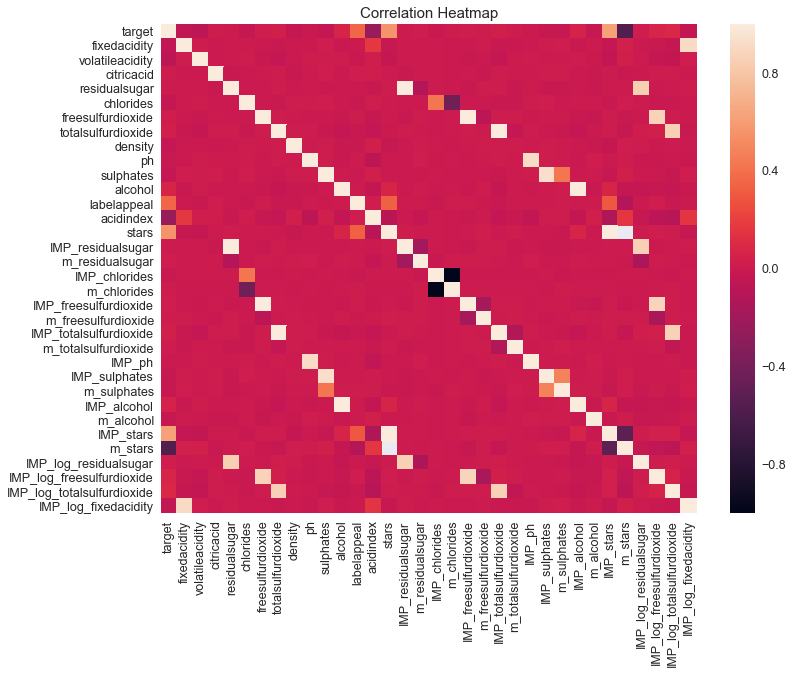

In [153]:
df_corr = df.copy()
del(df_corr['m_ph'])
corr_matrix = df_corr.corr()

f, ax = plt.subplots(figsize = (12, 9))
ax = plt.axes()
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values, ax = ax)

ax.set_title('Correlation Heatmap')
plt.show()

In [154]:
test_df.columns

Index(['index', 'target', 'fixedacidity', 'volatileacidity', 'citricacid',
       'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide',
       'density', 'ph', 'sulphates', 'alcohol', 'labelappeal', 'acidindex',
       'stars', 'IMP_residualsugar', 'm_residualsugar', 'IMP_chlorides',
       'm_chlorides', 'IMP_freesulfurdioxide', 'm_freesulfurdioxide',
       'IMP_totalsulfurdioxide', 'm_totalsulfurdioxide', 'IMP_ph', 'm_ph',
       'IMP_sulphates', 'm_sulphates', 'IMP_alcohol', 'm_alcohol', 'IMP_stars',
       'm_stars'],
      dtype='object')

In [155]:
test_df.fixedacidity = replace_outliers_with_q1_q2(test_df.fixedacidity)
test_df.volatileacidity = replace_outliers_with_q1_q2(test_df.volatileacidity)
test_df.citricacid = replace_outliers_with_q1_q2(test_df.citricacid)
test_df.density = replace_outliers_with_q1_q2(test_df.density)
test_df.acidindex = replace_outliers_with_q3_q4(test_df.acidindex)

test_df.IMP_residualsugar = replace_outliers_with_q1_q2(test_df.IMP_residualsugar)
test_df.IMP_freesulfurdioxide = replace_outliers_with_q1_q2(test_df.IMP_freesulfurdioxide)
test_df.IMP_totalsulfurdioxide = replace_outliers_with_q1_q2(test_df.IMP_totalsulfurdioxide)
test_df.IMP_ph = replace_outliers_with_q1_q2(test_df.IMP_ph)
test_df.IMP_sulphates = replace_outliers_with_q1_q2(test_df.IMP_sulphates)
test_df.IMP_alcohol = replace_outliers_with_q1_q2(test_df.IMP_alcohol)

In [156]:
test_df['IMP_log_residualsugar'] = np.log(test_df.IMP_residualsugar)
test_df['IMP_log_freesulfurdioxide'] = np.log(test_df.IMP_freesulfurdioxide)
test_df['IMP_log_totalsulfurdioxide'] = np.log(test_df.IMP_totalsulfurdioxide)

//anaconda/envs/PREDICT/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [157]:
test_df['IMP_log_fixedacidity'] = np.log(test_df.fixedacidity)
test_df['IMP_log_fixedacidity'] = abs(test_df.IMP_log_fixedacidity)

In [158]:
test_df['target'] = test_df['target'].replace({np.NaN: 0}).astype(int)
test_df.columns

Index(['index', 'target', 'fixedacidity', 'volatileacidity', 'citricacid',
       'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide',
       'density', 'ph', 'sulphates', 'alcohol', 'labelappeal', 'acidindex',
       'stars', 'IMP_residualsugar', 'm_residualsugar', 'IMP_chlorides',
       'm_chlorides', 'IMP_freesulfurdioxide', 'm_freesulfurdioxide',
       'IMP_totalsulfurdioxide', 'm_totalsulfurdioxide', 'IMP_ph', 'm_ph',
       'IMP_sulphates', 'm_sulphates', 'IMP_alcohol', 'm_alcohol', 'IMP_stars',
       'm_stars', 'IMP_log_residualsugar', 'IMP_log_freesulfurdioxide',
       'IMP_log_totalsulfurdioxide', 'IMP_log_fixedacidity'],
      dtype='object')

In [159]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# f_regression & SelectKBest

In [160]:
df.columns

Index(['target', 'fixedacidity', 'volatileacidity', 'citricacid',
       'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide',
       'density', 'ph', 'sulphates', 'alcohol', 'labelappeal', 'acidindex',
       'stars', 'IMP_residualsugar', 'm_residualsugar', 'IMP_chlorides',
       'm_chlorides', 'IMP_freesulfurdioxide', 'm_freesulfurdioxide',
       'IMP_totalsulfurdioxide', 'm_totalsulfurdioxide', 'IMP_ph', 'm_ph',
       'IMP_sulphates', 'm_sulphates', 'IMP_alcohol', 'm_alcohol', 'IMP_stars',
       'm_stars', 'IMP_log_residualsugar', 'IMP_log_freesulfurdioxide',
       'IMP_log_totalsulfurdioxide', 'IMP_log_fixedacidity'],
      dtype='object')

In [161]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
df_f = df.copy()
print(df_f.columns)

Index(['target', 'fixedacidity', 'volatileacidity', 'citricacid',
       'residualsugar', 'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide',
       'density', 'ph', 'sulphates', 'alcohol', 'labelappeal', 'acidindex',
       'stars', 'IMP_residualsugar', 'm_residualsugar', 'IMP_chlorides',
       'm_chlorides', 'IMP_freesulfurdioxide', 'm_freesulfurdioxide',
       'IMP_totalsulfurdioxide', 'm_totalsulfurdioxide', 'IMP_ph', 'm_ph',
       'IMP_sulphates', 'm_sulphates', 'IMP_alcohol', 'm_alcohol', 'IMP_stars',
       'm_stars', 'IMP_log_residualsugar', 'IMP_log_freesulfurdioxide',
       'IMP_log_totalsulfurdioxide', 'IMP_log_fixedacidity'],
      dtype='object')


In [162]:

temp_y = df_f.target.fillna(0)
temp_X = df_f.iloc[:,1:35]

In [163]:
temp_X.columns
temp_X['residualsugar'] = df_f['residualsugar'].replace({np.NaN: 5}).astype(int)
temp_X['chlorides'] = df_f['chlorides'].replace({np.NaN: 0}).astype(int)
temp_X['freesulfurdioxide'] = df_f['freesulfurdioxide'].replace({np.NaN: 31}).astype(int)
temp_X['totalsulfurdioxide'] = df_f['totalsulfurdioxide'].replace({np.NaN: 121}).astype(int)
temp_X['ph'] = df_f['ph'].replace({np.NaN: 3}).astype(int)
temp_X['sulphates'] = df_f['sulphates'].replace({np.NaN: 1}).astype(int)
temp_X['alcohol'] = df_f['alcohol'].replace({np.NaN: 10}).astype(int)
temp_X['stars'] = df_f['stars'].replace({np.NaN: 0}).astype(int)


In [164]:
del(temp_X['IMP_log_residualsugar'])
del(temp_X['labelappeal'])

In [165]:
temp_X.columns

Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'ph',
       'sulphates', 'alcohol', 'acidindex', 'stars', 'IMP_residualsugar',
       'm_residualsugar', 'IMP_chlorides', 'm_chlorides',
       'IMP_freesulfurdioxide', 'm_freesulfurdioxide',
       'IMP_totalsulfurdioxide', 'm_totalsulfurdioxide', 'IMP_ph', 'm_ph',
       'IMP_sulphates', 'm_sulphates', 'IMP_alcohol', 'm_alcohol', 'IMP_stars',
       'm_stars', 'IMP_log_freesulfurdioxide', 'IMP_log_totalsulfurdioxide',
       'IMP_log_fixedacidity'],
      dtype='object')

In [166]:
#print(temp_X[temp_X.values == 0].count())
#print(temp_X[temp_X.values < 0].count())
temp_X[temp_X < 0].count()

fixedacidity                  0
volatileacidity               0
citricacid                    0
residualsugar                 0
chlorides                     0
freesulfurdioxide             0
totalsulfurdioxide            0
density                       0
ph                            0
sulphates                     0
alcohol                       0
acidindex                     0
stars                         0
IMP_residualsugar             0
m_residualsugar               0
IMP_chlorides                 0
m_chlorides                   0
IMP_freesulfurdioxide         0
m_freesulfurdioxide           0
IMP_totalsulfurdioxide        0
m_totalsulfurdioxide          0
IMP_ph                        0
m_ph                          0
IMP_sulphates                 0
m_sulphates                   0
IMP_alcohol                   0
m_alcohol                     0
IMP_stars                     0
m_stars                       0
IMP_log_freesulfurdioxide     0
IMP_log_totalsulfurdioxide    0
IMP_log_

In [167]:
selector = SelectKBest(f_regression, k='all').fit(temp_X,temp_y)
x_new = selector.transform(temp_X) # not needed to get the score
scores = selector.scores_
print(x_new.shape)
for n,s in zip(temp_X.columns,selector.scores_):
    print("F-score: %3.2f\t  for feature\t %s " % (s,n))

(12795, 32)
F-score: 37.68	  for feature	 fixedacidity 
F-score: 63.34	  for feature	 volatileacidity 
F-score: 2.79	  for feature	 citricacid 
F-score: 0.04	  for feature	 residualsugar 
F-score: 2.49	  for feature	 chlorides 
F-score: 7.13	  for feature	 freesulfurdioxide 
F-score: 14.24	  for feature	 totalsulfurdioxide 
F-score: 15.73	  for feature	 density 
F-score: 0.05	  for feature	 ph 
F-score: 6.01	  for feature	 sulphates 
F-score: 49.18	  for feature	 alcohol 
F-score: 750.49	  for feature	 acidindex 
F-score: 11333.25	  for feature	 stars 
F-score: 0.06	  for feature	 IMP_residualsugar 
F-score: 5.77	  for feature	 m_residualsugar 
F-score: 2.49	  for feature	 IMP_chlorides 
F-score: 2.49	  for feature	 m_chlorides 
F-score: 7.11	  for feature	 IMP_freesulfurdioxide 
F-score: 1.24	  for feature	 m_freesulfurdioxide 
F-score: 14.73	  for feature	 IMP_totalsulfurdioxide 
F-score: 1.60	  for feature	 m_totalsulfurdioxide 
F-score: 0.06	  for feature	 IMP_ph 
F-score: 0.55	  f

### IMP_stars, m_stars, acidindex, IMP_log_totalsulfurdioxide, IMP_log_freesulfurdioxide, IMP_alcohol, volatileacidity and fixedacidity

# OLS

In [168]:
df['IMP_log_citricacid'] = np.log(abs(df.citricacid)+1)
#df['IMP_log_citricacid'] = abs(df.IMP_log_citricacid)

test_df['IMP_log_citricacid'] = np.log(abs(test_df.citricacid)+1)
#test_df['IMP_log_citricacid'] = abs(test_df.IMP_log_citricacid)


In [169]:
#selected_features_1 = 'volatileacidity  + IMP_log_freesulfurdioxide + IMP_log_totalsulfurdioxide + IMP_alcohol + labelappeal + acidindex + IMP_stars + m_stars'

#selected_features_1 = 'volatileacidity + fixedacidity + m_residualsugar + IMP_log_freesulfurdioxide + m_freesulfurdioxide + IMP_log_totalsulfurdioxide + m_totalsulfurdioxide + IMP_alcohol + labelappeal + acidindex + IMP_stars + m_stars'
selected_features_1 = 'IMP_log_citricacid + volatileacidity + fixedacidity + m_residualsugar + IMP_log_freesulfurdioxide + m_freesulfurdioxide + IMP_log_totalsulfurdioxide + m_totalsulfurdioxide + IMP_alcohol + labelappeal + acidindex + IMP_stars + m_stars'

y = df['target']
model_1_result_1 = ols('target ~' + selected_features_1, data=df).fit()
print(model_1_result_1.summary())

#anova table
aov_table_1 = sm.stats.anova_lm(model_1_result_1, typ=2)
print(aov_table_1)

#Get predictions and residuals
x1_predictions_1 = model_1_result_1.predict()
x1_residuals_1 = y - x1_predictions_1

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1139.
Date:                Sun, 04 Mar 2018   Prob (F-statistic):               0.00
Time:                        13:14:51   Log-Likelihood:                -21620.
No. Observations:               12795   AIC:                         4.327e+04
Df Residuals:                   12781   BIC:                         4.337e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

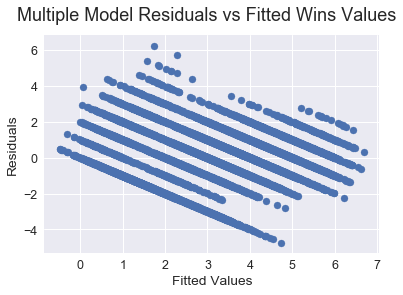

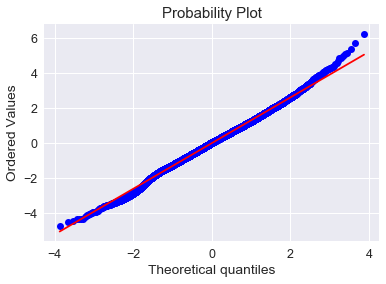

Mean Abosolute Error:  1.0290982750127364


In [170]:
#Residuals vs Fitted
fig = plt.figure()
plt.scatter(x=x1_predictions_1, y= x1_residuals_1)
fig.suptitle('Multiple Model Residuals vs Fitted Wins Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#QQPlot
stats.probplot(x1_residuals_1, dist="norm", plot=plt)
plt.show()

print("Mean Abosolute Error: ", mean_absolute_error(y, x1_predictions_1)) 

In [171]:
test_predictions_1 = model_1_result_1.predict(test_df)
print(test_predictions_1)

0       1.281549
1       3.990624
2       2.395137
3       2.392748
4       0.660648
5       5.702388
6       3.516748
7       2.039098
8       0.626386
9       1.492181
10      2.853101
11      1.520916
12      3.486871
13      1.231622
14      0.707840
15      2.656841
16      2.500856
17      1.125175
18      3.781249
19      5.200467
20      2.765905
21      1.181602
22      2.200212
23      2.412156
24      3.853324
25      4.557628
26      3.033082
27      6.067542
28      5.152473
29      2.667836
          ...   
3305    3.921848
3306    1.404042
3307    1.314212
3308    1.316962
3309    2.963421
3310    3.005244
3311    2.450737
3312    3.250571
3313    3.979178
3314    1.679849
3315    2.963689
3316    2.570769
3317    2.822387
3318    4.866585
3319    3.185238
3320    1.404760
3321    1.736632
3322    4.949822
3323    3.577160
3324    4.809301
3325    5.402172
3326    4.861281
3327    1.019054
3328    1.359950
3329    2.979421
3330    3.629075
3331    5.083100
3332    3.7313

In [172]:
d = {'P_TARGET': test_predictions_1}
df1 = test_df[['index']].astype(int)
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file.head)
your_file.to_csv('Wine_Sales_test_predictions_ols.csv', index=False) 

<bound method NDFrame.head of       index  P_TARGET
0         3  1.281549
1         9  3.990624
2        10  2.395137
3        18  2.392748
4        21  0.660648
5        30  5.702388
6        31  3.516748
7        37  2.039098
8        39  0.626386
9        47  1.492181
10       60  2.853101
11       62  1.520916
12       63  3.486871
13       64  1.231622
14       68  0.707840
15       75  2.656841
16       76  2.500856
17       83  1.125175
18       87  3.781249
19       92  5.200467
20       98  2.765905
21      106  1.181602
22      107  2.200212
23      113  2.412156
24      120  3.853324
25      123  4.557628
26      125  3.033082
27      126  6.067542
28      128  5.152473
29      129  2.667836
...     ...       ...
3305  15965  3.921848
3306  15966  1.404042
3307  15978  1.314212
3308  15983  1.316962
3309  15987  2.963421
3310  15988  3.005244
3311  15998  2.450737
3312  16004  3.250571
3313  16008  3.979178
3314  16011  1.679849
3315  16023  2.963689
3316  16024  2.570769
33

In [173]:
def rmse(Y_test,Y_pred):   
    return np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

In [174]:
print('AIC %f \nBIC %f' %(model_1_result_1.aic, model_1_result_1.bic))
print('RMSE value: %f' % rmse(y,x1_predictions_1))

AIC 43268.504385 
BIC 43372.899721
RMSE value: 1.311018


# Poisson

In [175]:
import statsmodels.formula.api as smf

y = df['target']
#X = df[["volatileacidity","IMP_residualsugar", "IMP_chlorides", "IMP_freesulfurdioxide", "IMP_totalsulfurdioxide", "IMP_ph", "IMP_sulphates", "IMP_alcohol", "labelappeal", "acidindex", "IMP_stars", "m_stars"]].copy()
#X = df[["volatileacidity","IMP_residualsugar", "IMP_chlorides", "IMP_log_freesulfurdioxide", "IMP_log_totalsulfurdioxide", "IMP_ph", "IMP_sulphates", "IMP_alcohol", "labelappeal", "acidindex", "IMP_stars", "m_stars"]].copy()
X = df[["IMP_log_citricacid", "volatileacidity","m_residualsugar", "IMP_log_freesulfurdioxide", "m_freesulfurdioxide", "IMP_log_totalsulfurdioxide", "m_totalsulfurdioxide", "IMP_alcohol", "labelappeal", "acidindex", "IMP_stars", "m_stars"]].copy()

X["intercept"] = 1
#X = sm.add_constant(X)

model_1 = sm.Poisson(y, X).fit(disp=0)
result_1 = model_1.predict(X)
result_1.head()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                 target   No. Observations:                12795
Model:                        Poisson   Df Residuals:                    12782
Method:                           MLE   Df Model:                           12
Date:                Sun, 04 Mar 2018   Pseudo R-squ.:                  0.1651
Time:                        13:14:52   Log-Likelihood:                -22877.
converged:                       True   LL-Null:                       -27401.
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
IMP_log_citricacid             0.0266      0.017      1.613      0.107      -0.006       0.059
volatileacidity               -0.0388      0.010     -4.043      0.000      -0.058      -0.020
m_residualsugar                0.0289      0.019      1.493      0.135      -0.009       0.067
IMP_log_freesulfurdioxide      0.0190      0.005      3.947      0.000       0.010       0.028
m_freesulfurdioxide            0.0423      0.021      1.988      0.047       0.001       0.084
IMP_log_totalsulfurdioxide     0.0345      0.006      5.532      0.000       0.022       0.047
m_totalsulfurdioxide           0.0306      0.022      1.410      0.159      -0.012       0.073
IMP_alcohol                    0.0041      0.001      2.793      0.005       0.001       0.007
labelappeal                    0.1582      0.006     25.811      0.000       0.146       0.170
acidindex                     -0.0839      0.005    -16.134      0.000      -0.094      -0.074
IMP_stars                      0.1883      0.006     30.884      0.000       0.176       0.200
m_stars                       -0.8405      0.018    -45.921      0.000      -0.876      -0.805
intercept                      1.2239      0.061     20.012      0.000       1.104       1.344
==============================================================================================
"""

In [176]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Poisson
===========================================================================
Model:                  Poisson             Pseudo R-squared:    0.165     
Dependent Variable:     target              AIC:                 45779.0043
Date:                   2018-03-04 13:14    BIC:                 45875.9429
No. Observations:       12795               Log-Likelihood:      -22877.   
Df Model:               12                  LL-Null:             -27401.   
Df Residuals:           12782               LLR p-value:         0.0000    
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         9.0000                                             
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
IMP_log_citricacid          0.0266   0.0165   1.6132 0.1067 -0.0057  0.0590
volatileacidity            -0.0388   0.0096  -4.0435 0.0001 -0.0577 -0.0200
m_residualsugar             0.0289   0.0193   1.4933 0.1354 -0.0090  0.0668
IMP_log_freesulfurdioxide   0.0190   0.0048   3.9470 0.0001  0.0096  0.0284
m_freesulfurdioxide         0.0423   0.0213   1.9880 0.0468  0.0006  0.0839
IMP_log_totalsulfurdioxide  0.0345   0.0062   5.5317 0.0000  0.0223  0.0467
m_totalsulfurdioxide        0.0306   0.0217   1.4098 0.1586 -0.0119  0.0731
IMP_alcohol                 0.0041   0.0015   2.7931 0.0052  0.0012  0.0070
labelappeal                 0.1582   0.0061  25.8109 0.0000  0.1462  0.1702
acidindex                  -0.0839   0.0052 -16.1336 0.0000 -0.0941 -0.0737
IMP_stars                   0.1883   0.0061  30.8840 0.0000  0.1763  0.2002
m_stars                    -0.8405   0.0183 -45.9212 0.0000 -0.8764 -0.8047
intercept                   1.2239   0.0612  20.0124 0.0000  1.1040  1.3437
===========================================================================

"""

In [177]:
print('AIC %f \nBIC %f' %(model_1.aic, model_1.bic))

AIC 45779.004333 
BIC 45875.942860


In [178]:
#X_test = test_df[["volatileacidity", "IMP_chlorides", "IMP_freesulfurdioxide", "m_freesulfurdioxide", "IMP_totalsulfurdioxide", "IMP_ph", "IMP_sulphates", "IMP_alcohol", "labelappeal", "acidindex", "IMP_stars", "m_stars"]].copy()
#X_test = test_df[["volatileacidity","IMP_residualsugar", "IMP_chlorides", "IMP_log_freesulfurdioxide", "IMP_log_totalsulfurdioxide", "IMP_ph", "IMP_sulphates", "IMP_alcohol", "labelappeal", "acidindex", "IMP_stars", "m_stars"]].copy()
X_test = test_df[["IMP_log_citricacid", "volatileacidity","m_residualsugar", "IMP_log_freesulfurdioxide", "m_freesulfurdioxide", "IMP_log_totalsulfurdioxide", "m_totalsulfurdioxide", "IMP_alcohol", "labelappeal", "acidindex", "IMP_stars", "m_stars"]].copy()
X_test["intercept"] = 1
#X_test = sm.add_constant(X_test)
X_test.columns

Index(['IMP_log_citricacid', 'volatileacidity', 'm_residualsugar',
       'IMP_log_freesulfurdioxide', 'm_freesulfurdioxide',
       'IMP_log_totalsulfurdioxide', 'm_totalsulfurdioxide', 'IMP_alcohol',
       'labelappeal', 'acidindex', 'IMP_stars', 'm_stars', 'intercept'],
      dtype='object')

AIC 45779.004333 
BIC 45875.942860
RMSE value: 3.377104


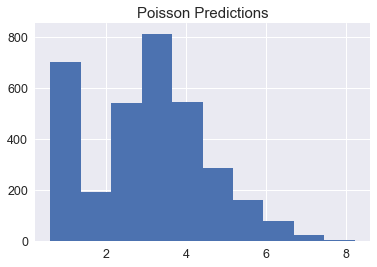

In [179]:
y_test = test_df['target']
#Y_pred = mod2.predict(X_test)

test_predictions_1 = model_1.predict(X_test)
test_predictions_1.head()
plt.hist(test_predictions_1)
plt.title("Poisson Predictions")
#rmse(y_test,test_predictions_1)
print('AIC %f \nBIC %f' %(model_1.aic, model_1.bic))
print('RMSE value: %f' % rmse(y_test,test_predictions_1))

In [180]:
d = {'P_TARGET': test_predictions_1}
df1 = test_df[['index']].astype(int)
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file.head)

<bound method NDFrame.head of       index  P_TARGET
0         3  1.219279
1         9  3.962830
2        10  2.462213
3        18  2.455962
4        21  0.965525
5        30  6.069175
6        31  3.048443
7        37  1.579011
8        39  0.956687
9        47  1.299067
10       60  2.891551
11       62  1.295775
12       63  3.328650
13       64  1.192528
14       68  0.987844
15       75  2.459106
16       76  2.572595
17       83  1.134374
18       87  3.687211
19       92  5.580888
20       98  2.592751
21      106  1.162559
22      107  1.646468
23      113  2.499256
24      120  3.816893
25      123  4.779666
26      125  2.824320
27      126  6.903660
28      128  5.022519
29      129  2.733370
...     ...       ...
3305  15965  3.882968
3306  15966  1.251063
3307  15978  1.228430
3308  15983  1.205516
3309  15987  2.537292
3310  15988  3.072141
3311  15998  2.530443
3312  16004  3.300730
3313  16008  3.688937
3314  16011  1.374486
3315  16023  3.020915
3316  16024  2.634930
33

# Negative Binomial Regression

In [181]:
model_2 = sm.NegativeBinomial(y, X).fit(disp=0)
result_2 = model_2.predict(X)
test_predictions_2 = model_2.predict(X_test)
test_predictions_2.head()
model_2.summary2()

//anaconda/envs/PREDICT/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: NegativeBinomial
===========================================================================
Model:                  NegativeBinomial    Pseudo R-squared:    0.158     
Dependent Variable:     target              AIC:                 45781.0065
Date:                   2018-03-04 13:14    BIC:                 45885.4019
No. Observations:       12795               Log-Likelihood:      -22877.   
Df Model:               12                  LL-Null:             -27165.   
Df Residuals:           12782               LLR p-value:         0.0000    
Converged:              0.0000              Scale:               1.0000    
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
IMP_log_citricacid          0.0267   0.0165   1.6165 0.1060 -0.0057  0.0591
volatileacidity            -0.0388   0.0096  -4.0421 0.0001 -0.0576 -0.0200
m_residualsugar             0.0289   0.0193   1.4935 0.1353 -0.0090  0.0668
IMP_log_freesulfurdioxide   0.0190   0.0048   3.9512 0.0001  0.0096  0.0284
m_freesulfurdioxide         0.0422   0.0213   1.9865 0.0470  0.0006  0.0839
IMP_log_totalsulfurdioxide  0.0345   0.0062   5.5392 0.0000  0.0223  0.0468
m_totalsulfurdioxide        0.0305   0.0217   1.4082 0.1591 -0.0120  0.0730
IMP_alcohol                 0.0041   0.0015   2.7969 0.0052  0.0012  0.0070
labelappeal                 0.1582   0.0061  25.8092 0.0000  0.1462  0.1702
acidindex                  -0.0839   0.0052 -16.1247 0.0000 -0.0941 -0.0737
IMP_stars                   0.1883   0.0061  30.8903 0.0000  0.1764  0.2003
m_stars                    -0.8404   0.0183 -45.9142 0.0000 -0.8763 -0.8045
intercept                   1.2230   0.0612  19.9981 0.0000  1.1031  1.3429
alpha                       0.0000   0.0000   0.0085 0.9932 -0.0000  0.0000
===========================================================================

"""

In [182]:
print('AIC %f \nBIC %f' %(model_2.aic, model_2.bic))

AIC 45781.006523 
BIC 45885.401860


In [183]:
y_test = test_df['target']
Y_pred_2 = model_2.predict(X_test)
rmse(y_test,Y_pred_2)

3.3770710127750423

AIC 45781.006523 
BIC 45885.401860
RMSE value: 3.377071


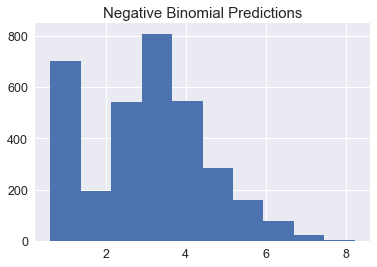

In [184]:
plt.hist(test_predictions_2)
plt.title("Negative Binomial Predictions")
print('AIC %f \nBIC %f' %(model_2.aic, model_2.bic))
print('RMSE value: %f' % rmse(y_test,Y_pred_2))

In [185]:
d = {'P_TARGET': Y_pred_2}
df1 = test_df[['index']].astype(int)
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file.head)

<bound method NDFrame.head of       index  P_TARGET
0         3  1.219350
1         9  3.962406
2        10  2.461906
3        18  2.455936
4        21  0.965632
5        30  6.069825
6        31  3.048375
7        37  1.579236
8        39  0.956794
9        47  1.299112
10       60  2.891544
11       62  1.296133
12       63  3.329014
13       64  1.192615
14       68  0.988063
15       75  2.459375
16       76  2.572729
17       83  1.134587
18       87  3.686943
19       92  5.580550
20       98  2.592930
21      106  1.162471
22      107  1.646628
23      113  2.499115
24      120  3.816852
25      123  4.778951
26      125  2.824719
27      126  6.903494
28      128  5.022982
29      129  2.733317
...     ...       ...
3305  15965  3.883096
3306  15966  1.250984
3307  15978  1.228568
3308  15983  1.205454
3309  15987  2.537735
3310  15988  3.072099
3311  15998  2.530332
3312  16004  3.300553
3313  16008  3.688745
3314  16011  1.374581
3315  16023  3.020562
3316  16024  2.634568
33

In [186]:

selected_columns = ["volatileacidity", "IMP_log_freesulfurdioxide", "IMP_log_totalsulfurdioxide", "IMP_alcohol", "labelappeal", "acidindex", "IMP_stars"]
selected_features_1 = 'IMP_log_citricacid + volatileacidity + fixedacidity + m_residualsugar + IMP_log_freesulfurdioxide + m_freesulfurdioxide + IMP_log_totalsulfurdioxide + m_totalsulfurdioxide + IMP_alcohol + labelappeal + acidindex + IMP_stars + m_stars'
#selected_columns = ["volatileacidity","IMP_residualsugar", "IMP_log_freesulfurdioxide", "IMP_log_totalsulfurdioxide", "IMP_ph", "labelappeal", "acidindex", "IMP_stars", "m_stars"]
X_train_hurdle = df[selected_columns]
X_test_hurdle = test_df[selected_columns]
X_test_1 = test_df[selected_columns]
X_test_1 = sm.add_constant(X_test_1)

In [187]:
y_train_hurdle = df['target']
y_test_hurdle = test_df['target']

# Poisson_Logit Hurdle Model

In [188]:
Xcon = X_train_hurdle.copy()
Xcon = sm.add_constant(Xcon)
Y_hurdle=pd.DataFrame(y_train_hurdle)
f=lambda x: 1 if x>0 else 0
Y_hurdle['FLAG']=Y_hurdle.applymap(f)
Y_hurdle_pois=(Y_hurdle[Y_hurdle.iloc[:,0]>0].target)-1
Y_hurdle_pois_test=Y_hurdle.target
X_hurdle_pois=Xcon[Xcon.index.isin(Y_hurdle_pois.index)]
Y_hurdle_log=Y_hurdle.FLAG

### Logistic Regression for Hurdle Model

In [189]:
log_hurdle=sm.Logit(Y_hurdle_log, Xcon).fit()
log_hurdle.summary()

Optimization terminated successfully.
         Current function value: 0.340143
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   FLAG   No. Observations:                12795
Model:                          Logit   Df Residuals:                    12787
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Mar 2018   Pseudo R-squ.:                  0.3444
Time:                        13:14:55   Log-Likelihood:                -4352.1
converged:                       True   LL-Null:                       -6637.9
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.9172      0.298     -3.079      0.002      -1.501      -0.333
volatileacidity               -0.1843      0.047     -3.900      0.000      -0.277      -0.092
IMP_log_freesulfurdioxide      0.0952      0.023      4.186      0.000       0.051       0.140
IMP_log_totalsulfurdioxide     0.2330      0.029      8.083      0.000       0.176       0.289
IMP_alcohol                   -0.0158      0.008     -2.092      0.036      -0.031      -0.001
labelappeal                   -0.4478      0.031    -14.615      0.000      -0.508      -0.388
acidindex                     -0.4494      0.024    -18.833      0.000      -0.496      -0.403
IMP_stars                      3.4792      0.110     31.673      0.000       3.264       3.695
==============================================================================================
"""

In [190]:
log_hurdle_pred = log_hurdle.predict(X_test_1)

In [191]:
#d = {'P_TARGET': log_hurdle_pred}
#df1 = test_df[['index']].astype(int)
#df2=pd.DataFrame(data=d)
#your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
#print(your_file.head)

### Poisson Regression for Hurdle Model


In [192]:
pois_hurdle=sm.GLM(Y_hurdle_pois, X_hurdle_pois,family=sm.families.Poisson()).fit()
pois_hurdle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                10061
Model:                            GLM   Df Residuals:                    10053
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -15648.
Date:                Sun, 04 Mar 2018   Deviance:                       2960.2
Time:                        13:14:55   Pearson chi2:                 2.62e+03
No. Iterations:                     4                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.8672      0.071     12.229      0.000       0.728       1.006
volatileacidity               -0.0143      0.011     -1.288      0.198      -0.036       0.007
IMP_log_freesulfurdioxide      0.0054      0.006      0.977      0.328      -0.005       0.016
IMP_log_totalsulfurdioxide    -0.0056      0.007     -0.769      0.442      -0.020       0.009
IMP_alcohol                    0.0095      0.002      5.543      0.000       0.006       0.013
labelappeal                    0.2966      0.007     41.175      0.000       0.282       0.311
acidindex                     -0.0278      0.006     -4.500      0.000      -0.040      -0.016
IMP_stars                      0.1309      0.007     19.533      0.000       0.118       0.144
==============================================================================================
"""

In [193]:
pois_hurdle_predict = pois_hurdle.predict(X_test_1)

In [194]:
Ypred_pois_hurdle=pois_hurdle.predict(X_test_1)

Y_pred_3 = log_hurdle_pred * pois_hurdle_predict
rmse(y_test_hurdle, Y_pred_3)

2.5717532643495775

AIC 31311.678131 
BIC -89692.454792
RMSE value: 2.571753


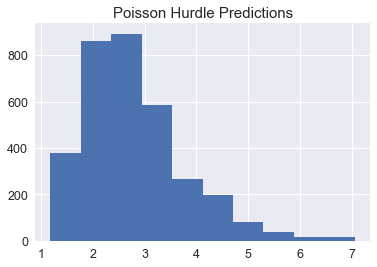

In [195]:
plt.hist(pois_hurdle_predict)
plt.title("Poisson Hurdle Predictions")
print('AIC %f \nBIC %f' %(pois_hurdle.aic, pois_hurdle.bic))
print('RMSE value: %f' % rmse(y_test_hurdle,Y_pred_3))

In [196]:
d = {'P_TARGET': Y_pred_3}
df1 = test_df[['index']].astype(int)
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file.head)

<bound method NDFrame.head of       index  P_TARGET
0         3  1.560849
1         9  2.978727
2        10  0.980304
3        18  1.204879
4        21  0.704214
5        30  4.811466
6        31  2.838807
7        37  1.956610
8        39  0.709231
9        47  1.624146
10       60  1.329010
11       62  1.059056
12       63  2.552400
13       64  1.378873
14       68  1.043636
15       75  1.864044
16       76  1.348784
17       83  0.695623
18       87  2.685426
19       92  4.306426
20       98  1.517449
21      106  1.240313
22      107  1.517884
23      113  1.295057
24      120  2.596162
25      123  4.721608
26      125  1.933978
27      126  5.036545
28      128  3.482301
29      129  1.430348
...     ...       ...
3305  15965  2.325358
3306  15966  0.927804
3307  15978  1.485650
3308  15983  0.786154
3309  15987  1.593410
3310  15988  1.666867
3311  15998  1.338440
3312  16004  1.492407
3313  16008  2.227149
3314  16011  1.353878
3315  16023  1.656699
3316  16024  1.338825
33

# Negative Binomial for Hurdle Model

In [197]:
neg_binom_hurdle=sm.GLM(Y_hurdle_pois, X_hurdle_pois,family=sm.families.NegativeBinomial()).fit()
neg_binom_hurdle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:                 target   No. Observations:                 10061
Model:                            GLM   Df Residuals:                     10053
Model Family:        NegativeBinomial   Df Model:                             7
Link Function:                    log   Scale:              0.07941712427617176
Method:                          IRLS   Log-Likelihood:                 -21748.
Date:                Sun, 04 Mar 2018   Deviance:                        1074.5
Time:                        13:14:55   Pearson chi2:                      798.
No. Iterations:                     6                                          
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.8494      0.040     21.504      0.000       0.772       0.927
volatileacidity               -0.0171      0.006     -2.763      0.006      -0.029      -0.005
IMP_log_freesulfurdioxide      0.0074      0.003      2.377      0.017       0.001       0.013
IMP_log_totalsulfurdioxide    -0.0060      0.004     -1.453      0.146      -0.014       0.002
IMP_alcohol                    0.0102      0.001     10.738      0.000       0.008       0.012
labelappeal                    0.3208      0.004     79.541      0.000       0.313       0.329
acidindex                     -0.0298      0.003     -8.687      0.000      -0.037      -0.023
IMP_stars                      0.1395      0.004     36.127      0.000       0.132       0.147
==============================================================================================
"""

In [198]:
neg_binom_hurdle_predict = neg_binom_hurdle.predict(X_test_1)

In [199]:
Ypred_neg_binom_hurdle = neg_binom_hurdle.predict(X_test_1)

Y_pred_4 = log_hurdle_pred * neg_binom_hurdle_predict
rmse(y_test_hurdle, Y_pred_4)

2.6154030323756627

In [200]:
d = {'P_TARGET': Y_pred_4}
df1 = test_df[['index']].astype(int)
df2=pd.DataFrame(data=d)
your_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])
print(your_file.head)

<bound method NDFrame.head of       index  P_TARGET
0         3  1.507460
1         9  2.990224
2        10  0.959539
3        18  1.165336
4        21  0.690145
5        30  5.016697
6        31  2.826610
7        37  1.982459
8        39  0.692236
9        47  1.606527
10       60  1.307351
11       62  1.073019
12       63  2.543627
13       64  1.357622
14       68  1.008039
15       75  1.805588
16       76  1.302375
17       83  0.693572
18       87  2.673151
19       92  4.448557
20       98  1.443994
21      106  1.223208
22      107  1.567497
23      113  1.245434
24      120  2.580531
25      123  4.929482
26      125  1.877510
27      126  5.264033
28      128  3.526391
29      129  1.382295
...     ...       ...
3305  15965  2.293585
3306  15966  0.937360
3307  15978  1.463173
3308  15983  0.791832
3309  15987  1.517515
3310  15988  1.619018
3311  15998  1.291324
3312  16004  1.511573
3313  16008  2.180760
3314  16011  1.366639
3315  16023  1.640556
3316  16024  1.294336
33

In [201]:
train_predictions = model_1.predict(X)
from sklearn.metrics import mean_squared_error
mean_squared_error(train_predictions, train['target'])

1.734366304272394

Text(0.5,1,'Random Forest Predictions')

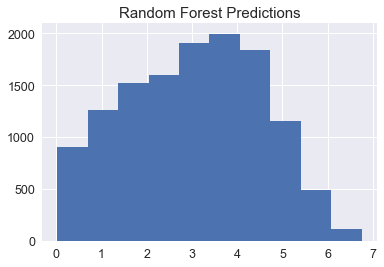

In [202]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the model with some parameters.
RFmodel = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
RFmodel.fit(X, y)
# Make predictions.
RFpredictions = RFmodel.predict(X)
# Compute the error.
mean_squared_error(RFpredictions, train['target'])
plt.hist(RFpredictions)
plt.title("Random Forest Predictions")

(array([ 908., 1260., 1517., 1599., 1910., 1997., 1839., 1159.,  491.,
         115.]),
 array([0.01975   , 0.69294512, 1.36614024, 2.03933536, 2.71253049,
        3.38572561, 4.05892073, 4.73211585, 5.40531097, 6.07850609,
        6.75170122]),
 <a list of 10 Patch objects>)

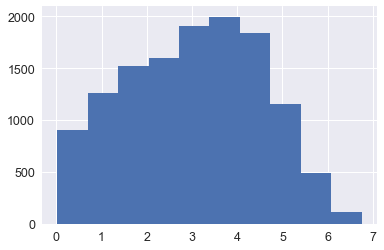

In [203]:
from sklearn.ensemble import RandomForestRegressor
# Initialize the model with some parameters.
RFmodel = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
RFmodel.fit(X, y)
# Make predictions.
RFpredictions = RFmodel.predict(X)
# Compute the error.
mean_squared_error(RFpredictions, train['target'])
plt.hist(RFpredictions)

Text(0.5,1,'SVC Predictions vs. Target')

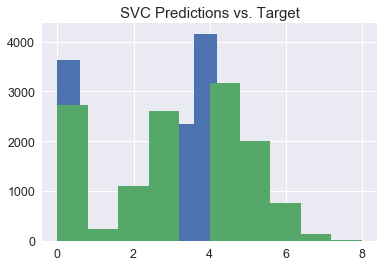

In [204]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y)
SVCpredictions = clf.predict(X)
mean_squared_error(SVCpredictions, train['target'])
plt.hist(SVCpredictions)
plt.hist(train['target'])
plt.title("SVC Predictions vs. Target")

In [205]:
#And more ways to compare models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(accuracy_score(y,SVCpredictions))
print(classification_report(y,SVCpredictions))
conf = confusion_matrix(y,SVCpredictions)

0.5174677608440797
             precision    recall  f1-score   support

          0       0.61      0.81      0.69      2734
          1       1.00      0.00      0.01       244
          2       0.47      0.24      0.32      1091
          3       0.47      0.43      0.45      2611
          4       0.48      0.63      0.55      3177
          5       0.48      0.45      0.47      2014
          6       0.55      0.15      0.23       765
          7       0.00      0.00      0.00       142
          8       0.00      0.00      0.00        17

avg / total       0.51      0.52      0.49     12795



//anaconda/envs/PREDICT/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


NB 0.45213148700156375
KNN 0.4269649750781861
DT 0.37123643960125097
SVM 0.49120809714620794


[Text(0,0,'NB'), Text(0,0,'KNN'), Text(0,0,'DT'), Text(0,0,'SVM')]

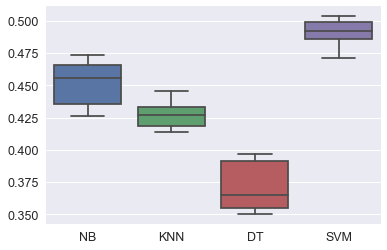

In [206]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
models = []
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

(array([3.642e+03, 1.000e+00, 0.000e+00, 5.580e+02, 0.000e+00, 2.348e+03,
        4.160e+03, 0.000e+00, 1.885e+03, 2.010e+02]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

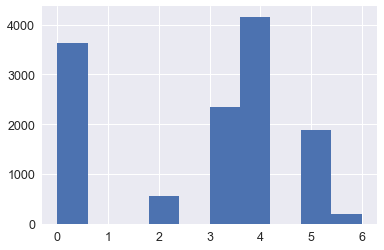

In [207]:
svc = SVC()
svc.fit(X, y)
SVCpredictions = svc.predict(X)
mean_squared_error(SVCpredictions, train['target'])
plt.hist(SVCpredictions)

In [208]:
SVCpredictions_test = svc.predict(X_test)
d = {'p_target': SVCpredictions_test}
df1 = test[['index']]
df2=pd.DataFrame(data=d)
SVC_file = pd.concat([df1,df2],axis = 1, join_axes=[df1.index])